In [20]:
import numpy as np
import math
def soft_prob_calc(x, nPower):
    return ((0.5 * x / (nPower + 1.0)) * ((np.sign(x) * ((x ** nPower) - (((-1.0) * x) ** nPower))) + (x ** nPower) + (((-1.0) * x) ** nPower)))
def get_ULP_values_dim1(x):
    h = math.ulp(x)
    xph = x + h
    xmh = x - h
    xp2h = xph + h
    xm2h = xmh - h
    return [xmh, xph, xp2h, xm2h]
def get_ULP_values_dim2(x2):
    h = math.ulp(x2)
    x2ph = x2 + h
    x2mh = x2 - h
    x2p2h = x2ph + h
    x2m2h = x2mh - h
    return [x2mh, x2ph, x2p2h, x2m2h]
def approx_DSN_term_dim2(x, nPower):
    shiftedvals = get_ULP_values_dim2(x)
    #print(shiftedvals)
    ABDSnumterm = abs(np.log10(abs(soft_prob_calc(shiftedvals[1], nPower) - soft_prob_calc(shiftedvals[0], nPower))))
    ABDSdenterm = abs(np.log10(abs(shiftedvals[1] - shiftedvals[0])))
    totnumterm = abs(np.log10(abs(soft_prob_calc(shiftedvals[3], nPower) - soft_prob_calc(shiftedvals[2], nPower))))
    totdenterm = abs(np.log10(abs(shiftedvals[3] - shiftedvals[2])))
    return abs((totnumterm - totdenterm) - (ABDSnumterm - ABDSdenterm))
    

# **CMSSM**

DSN = 6.662388824445


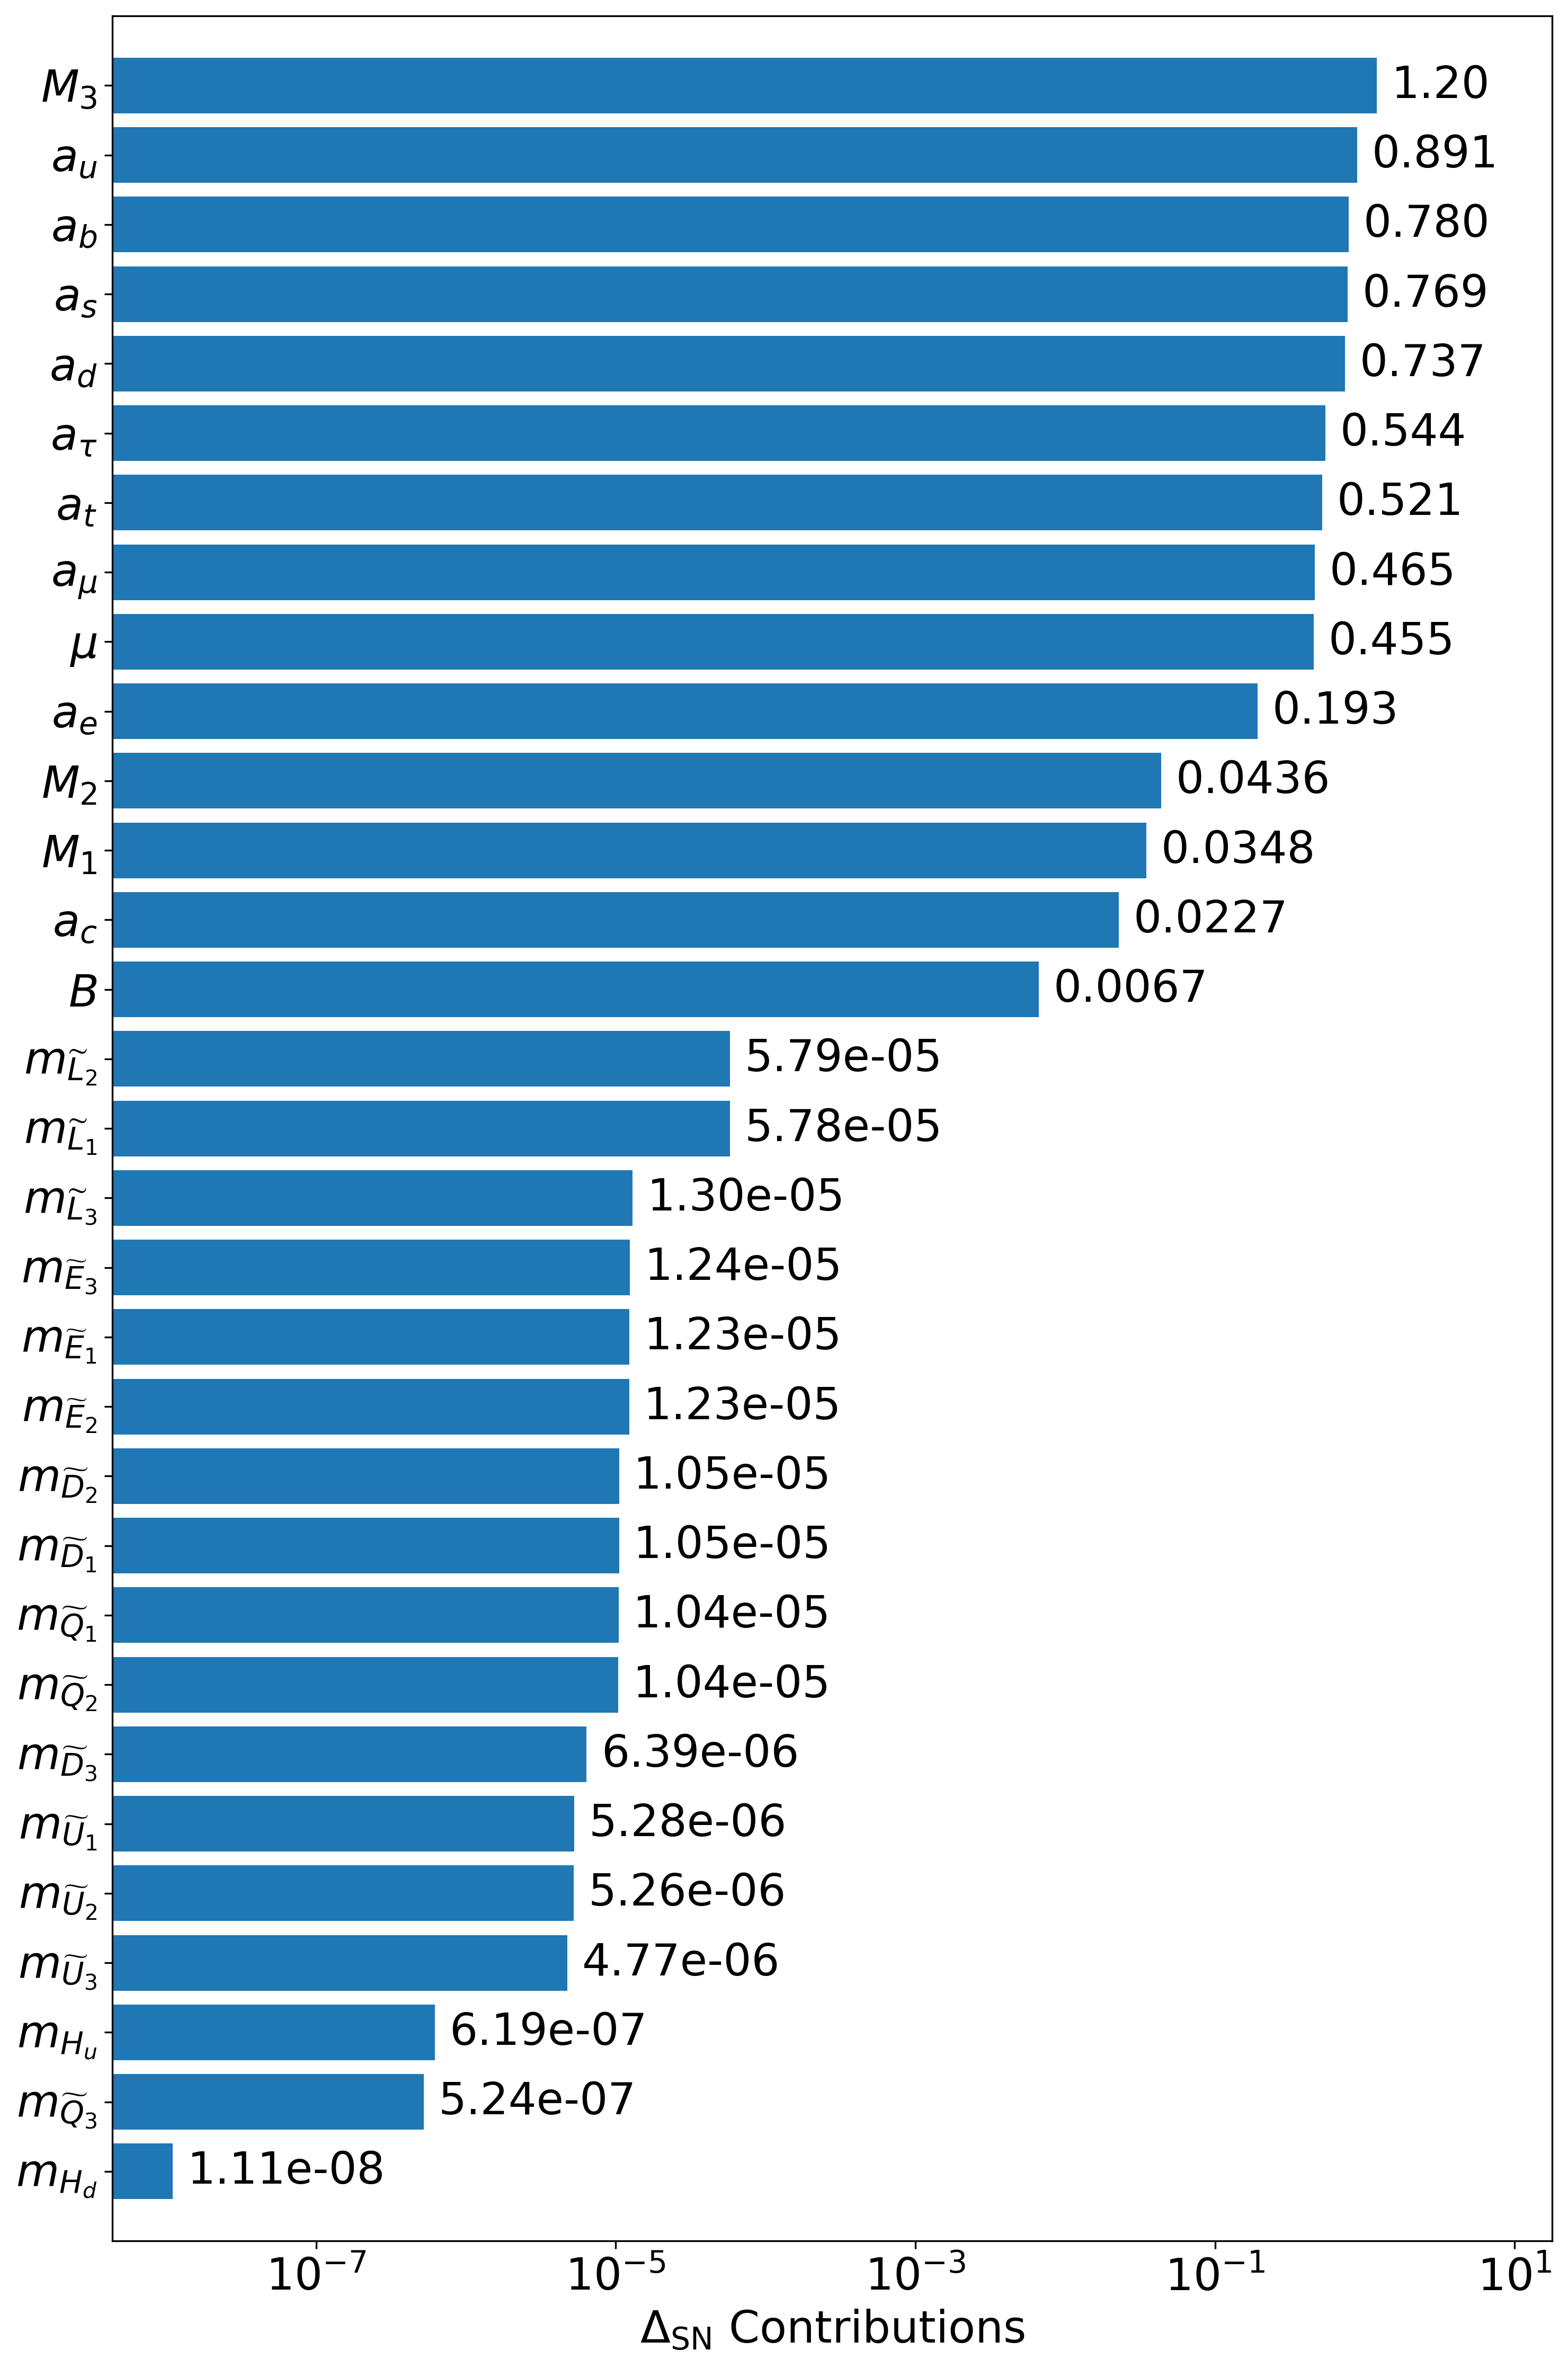

In [19]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 0.520860435818,
    r"$a_c$": 0.022707976411,
    r"$a_u$": 0.890748422523,
    r"$a_b$": 0.780379358980,
    r"$a_s$": 0.768682384501,
    r"$a_d$": 0.736830404116,
    r"$a_{\tau}$": 0.543627347513,
    r"$a_{\mu}$": 0.464826953932,
    r"$a_e$": 0.192599530557,
    r"$B$": 0.006670504295,
    r"$M_1$": 0.034763485033,
    r"$M_2$": 0.043550807391,
    r"$M_3$": 1.200490495192,
    r"$\mu$": 0.455420144159,
    r"$m_{H_{u}}$": 0.000000619373,
    r"$m_{H_{d}}$": 0.000000011051,
    r"$m_{\widetilde{Q}_{1}}$": 0.000010430551,
    r"$m_{\widetilde{Q}_{2}}$": 0.000010422344,
    r"$m_{\widetilde{Q}_{3}}$": 0.000000523552,
    r"$m_{\widetilde{L}_{1}}$": 0.000057808085,
    r"$m_{\widetilde{L}_{2}}$": 0.000057929193,
    r"$m_{\widetilde{L}_{3}}$": 0.000012982660,
    r"$m_{\widetilde{U}_{1}}$": 0.000005282627,
    r"$m_{\widetilde{U}_{2}}$": 0.000005263181,
    r"$m_{\widetilde{U}_{3}}$": 0.000004769300,
    r"$m_{\widetilde{D}_{1}}$": 0.000010533065,
    r"$m_{\widetilde{D}_{2}}$": 0.000010537152,
    r"$m_{\widetilde{D}_{3}}$": 0.000006392454, 
    r"$m_{\widetilde{E}_{1}}$": 0.000012322722,
    r"$m_{\widetilde{E}_{2}}$": 0.000012311837,
    r"$m_{\widetilde{E}_{3}}$": 0.000012434877
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.25)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **G2**

DSN = 22.599307300501557


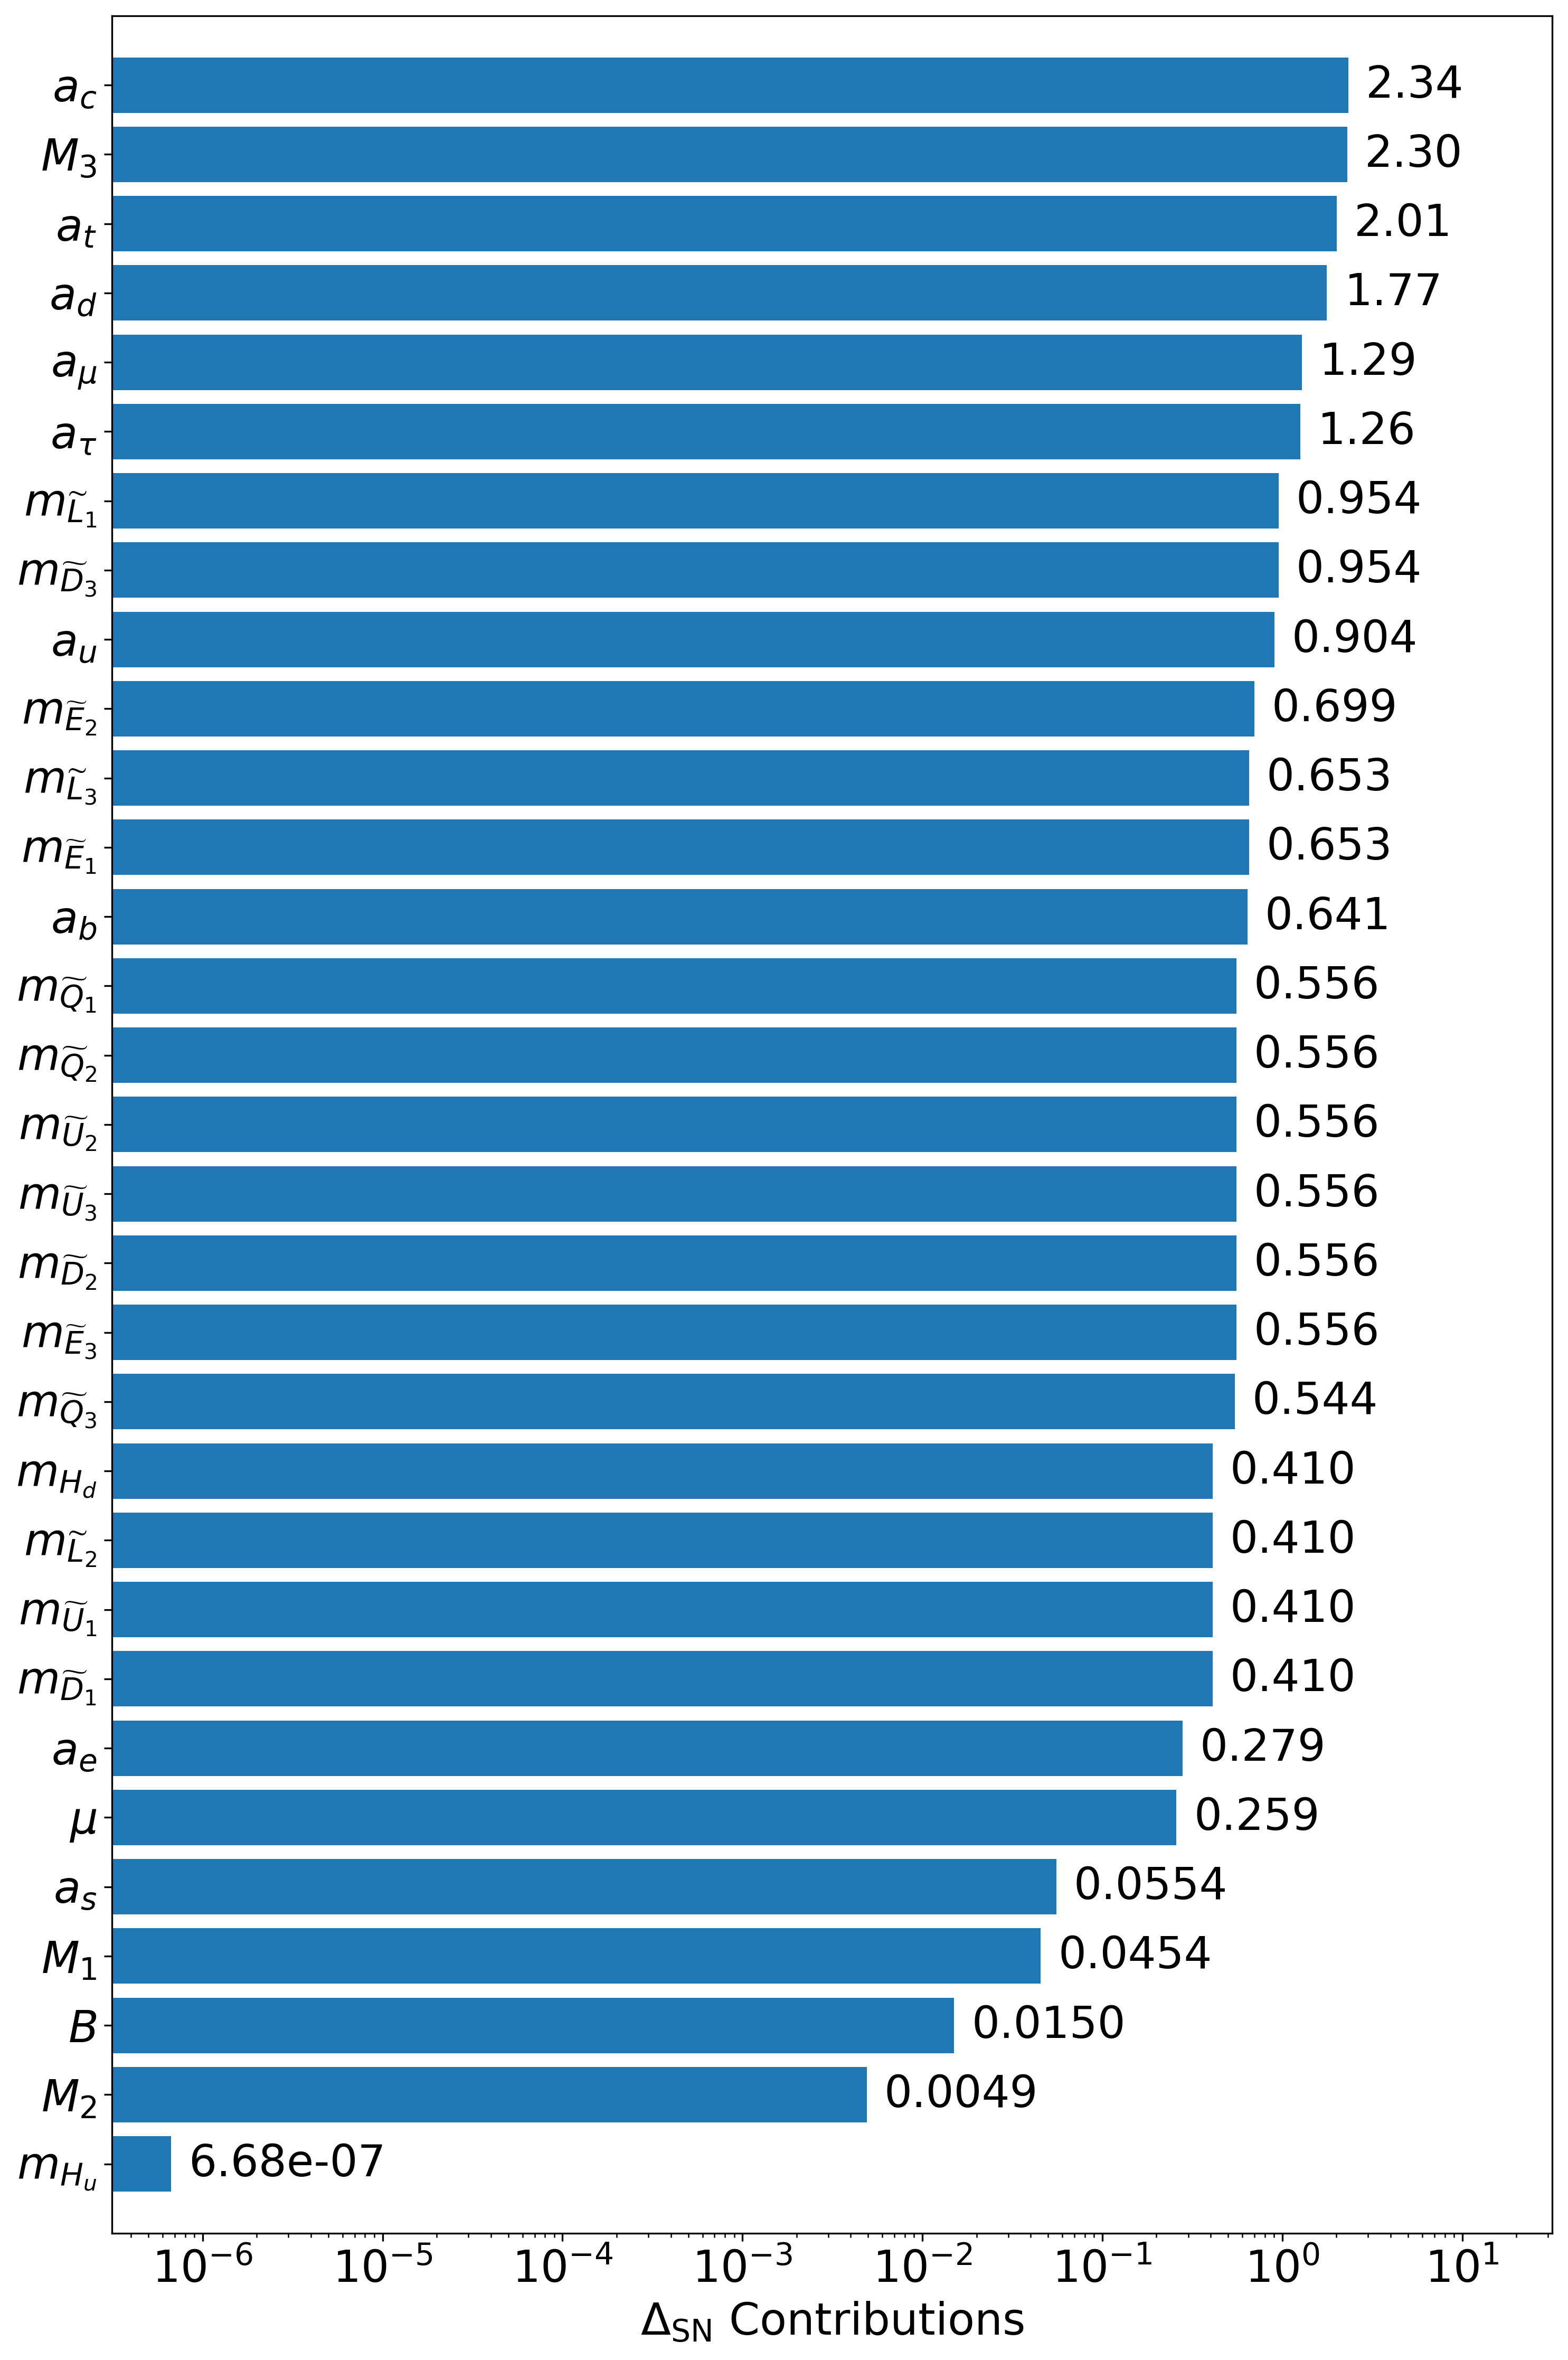

In [21]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 2.007537628282,
    r"$a_c$": 2.335431031696,
    r"$a_u$": 0.904017042167,
    r"$a_b$": 0.641277287296,
    r"$a_s$": 0.055417902476,
    r"$a_d$": 1.772730334687,
    r"$a_{\tau}$": 1.258321990002,
    r"$a_{\mu}$": 1.287616066832,
    r"$a_e$": 0.279167534934,
    r"$B$": 0.015023124483,
    r"$M_1$": 0.045424110799,
    r"$M_2$": 0.004914040772,
    r"$M_3$": 2.297452140075,
    r"$\mu$": 0.258515438111,
    r"$m_{H_{u}}$": 0.000000667814,
    r"$m_{H_{d}}$": approx_DSN_term_dim2(2463130739.393472671509, 1.0),
    r"$m_{\widetilde{Q}_{1}}$": approx_DSN_term_dim2(2425573171.029956340790, 1.0),
    r"$m_{\widetilde{Q}_{2}}$": approx_DSN_term_dim2(2425556572.247701168060, 1.0),
    r"$m_{\widetilde{Q}_{3}}$": approx_DSN_term_dim2(1829551987.891601800919, 1.0),
    r"$m_{\widetilde{L}_{1}}$": approx_DSN_term_dim2(2461826022.542126655579, 1.0),
    r"$m_{\widetilde{L}_{2}}$": approx_DSN_term_dim2(2461765073.105829238892, 1.0),
    r"$m_{\widetilde{L}_{3}}$": approx_DSN_term_dim2(2443347498.788306713104, 1.0),
    r"$m_{\widetilde{U}_{1}}$": approx_DSN_term_dim2(2413945418.788314819336, 1.0),
    r"$m_{\widetilde{U}_{2}}$": approx_DSN_term_dim2(2413926619.829204082489, 1.0),
    r"$m_{\widetilde{U}_{3}}$": approx_DSN_term_dim2(1242006872.146278142929, 1.0),
    r"$m_{\widetilde{D}_{1}}$": approx_DSN_term_dim2(2449883963.990045547485, 1.0),
    r"$m_{\widetilde{D}_{2}}$": approx_DSN_term_dim2(2449869315.537626743317, 1.0),
    r"$m_{\widetilde{D}_{3}}$": approx_DSN_term_dim2(2416819342.095021247864, 1.0),
    r"$m_{\widetilde{E}_{1}}$": approx_DSN_term_dim2(2524419935.518349170685, 1.0),
    r"$m_{\widetilde{E}_{2}}$": approx_DSN_term_dim2(2524297576.951811313629, 1.0),
    r"$m_{\widetilde{E}_{3}}$": approx_DSN_term_dim2(2487321152.343641757965, 1.0)
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.5)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **PeV** (not updated yet)

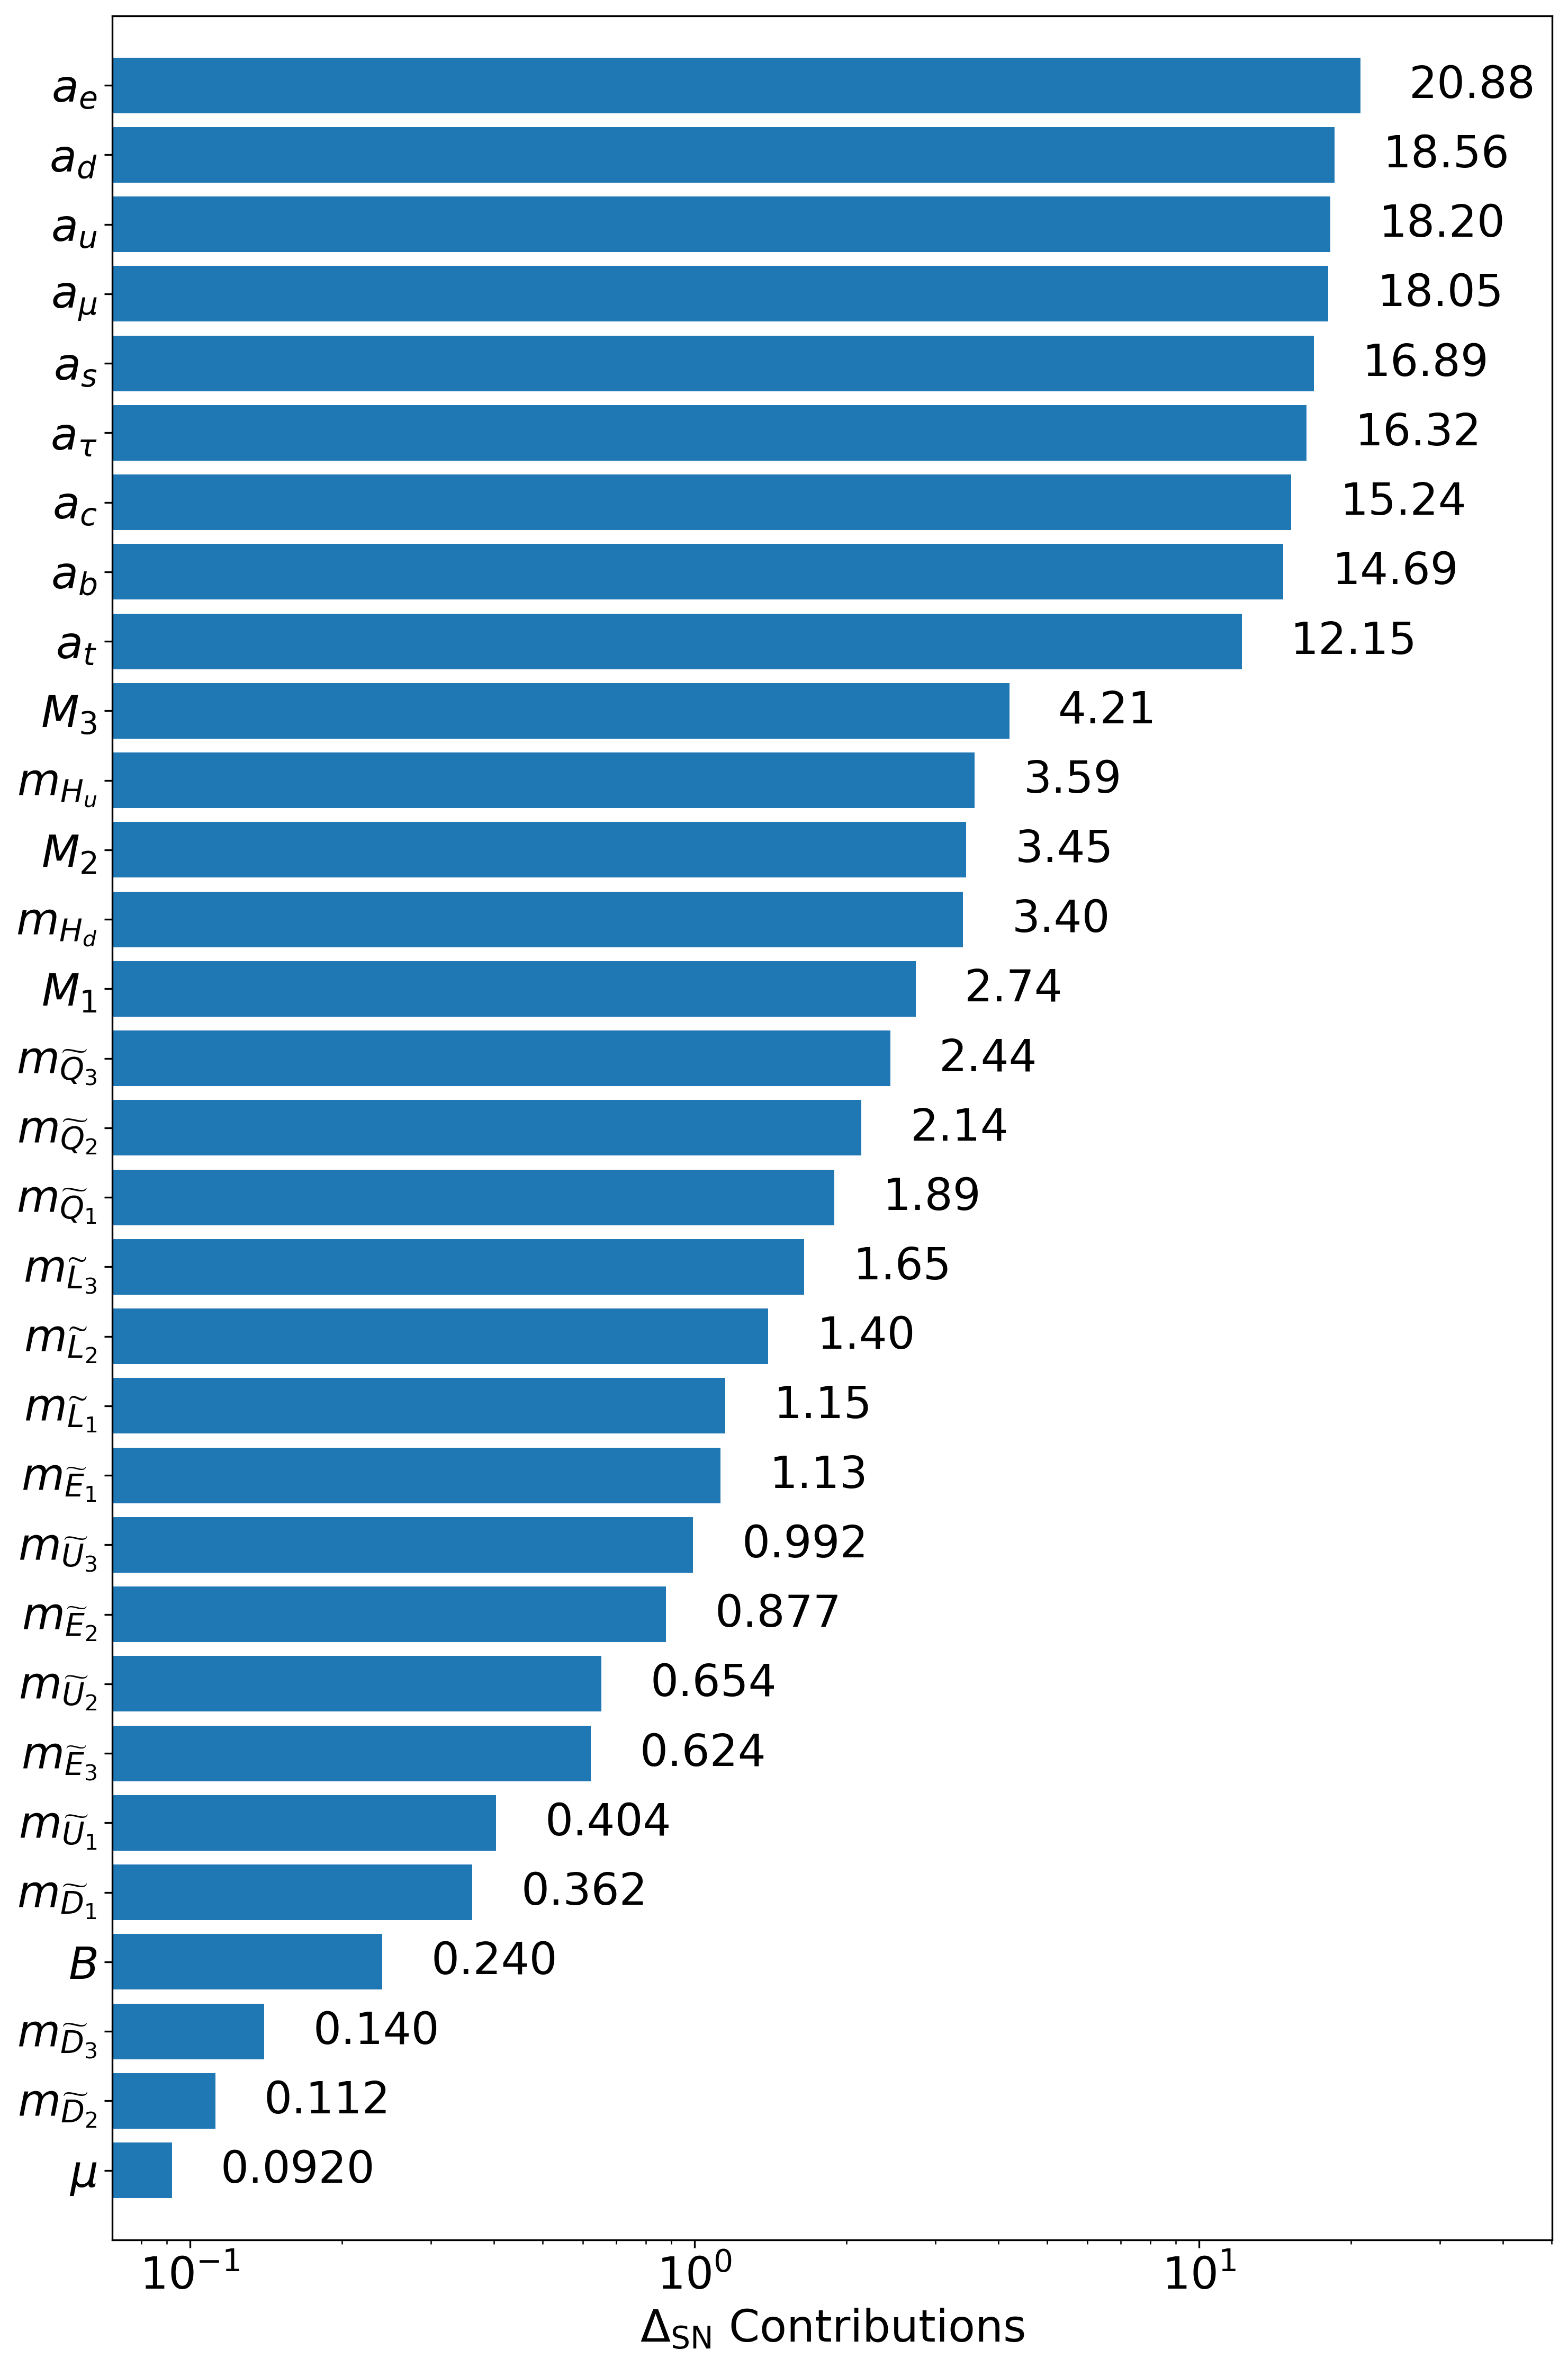

In [19]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 12.15271669,
    r"$a_c$": 15.23554148,
    r"$a_u$": 18.20409457,
    r"$a_b$": 14.68984239,
    r"$a_s$": 16.88950276,
    r"$a_d$": 18.5576178,
    r"$a_{\tau}$": 16.31813807,
    r"$a_{\mu}$": 18.04785946,
    r"$a_e$": 20.8772285,
    r"$B$": 0.240398221,
    r"$M_1$": 2.743082579,
    r"$M_2$": 3.453343576,
    r"$M_3$": 4.211057027,
    r"$\mu$": 0.092034499,
    r"$m_{H_{u}}$": 3.594557042,
    r"$m_{H_{d}}$": 3.403368341,
    r"$m_{\widetilde{Q}_{1}}$": 1.89201024,
    r"$m_{\widetilde{Q}_{2}}$": 2.142011287,
    r"$m_{\widetilde{Q}_{3}}$": 2.443573399,
    r"$m_{\widetilde{L}_{1}}$": 1.149357285,
    r"$m_{\widetilde{L}_{2}}$": 1.399362765,
    r"$m_{\widetilde{L}_{3}}$": 1.65092048,
    r"$m_{\widetilde{U}_{1}}$": 0.404236179,
    r"$m_{\widetilde{U}_{2}}$": 0.654237151,
    r"$m_{\widetilde{U}_{3}}$": 0.992496268,
    r"$m_{\widetilde{D}_{1}}$": 0.362199353,
    r"$m_{\widetilde{D}_{2}}$": 0.112198251,
    r"$m_{\widetilde{D}_{3}}$": 0.140210935, 
    r"$m_{\widetilde{E}_{1}}$": 1.127062214,
    r"$m_{\widetilde{E}_{2}}$": 0.877049782,
    r"$m_{\widetilde{E}_{3}}$": 0.623531654
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.7)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **HS** (partially updated through $M_2$)

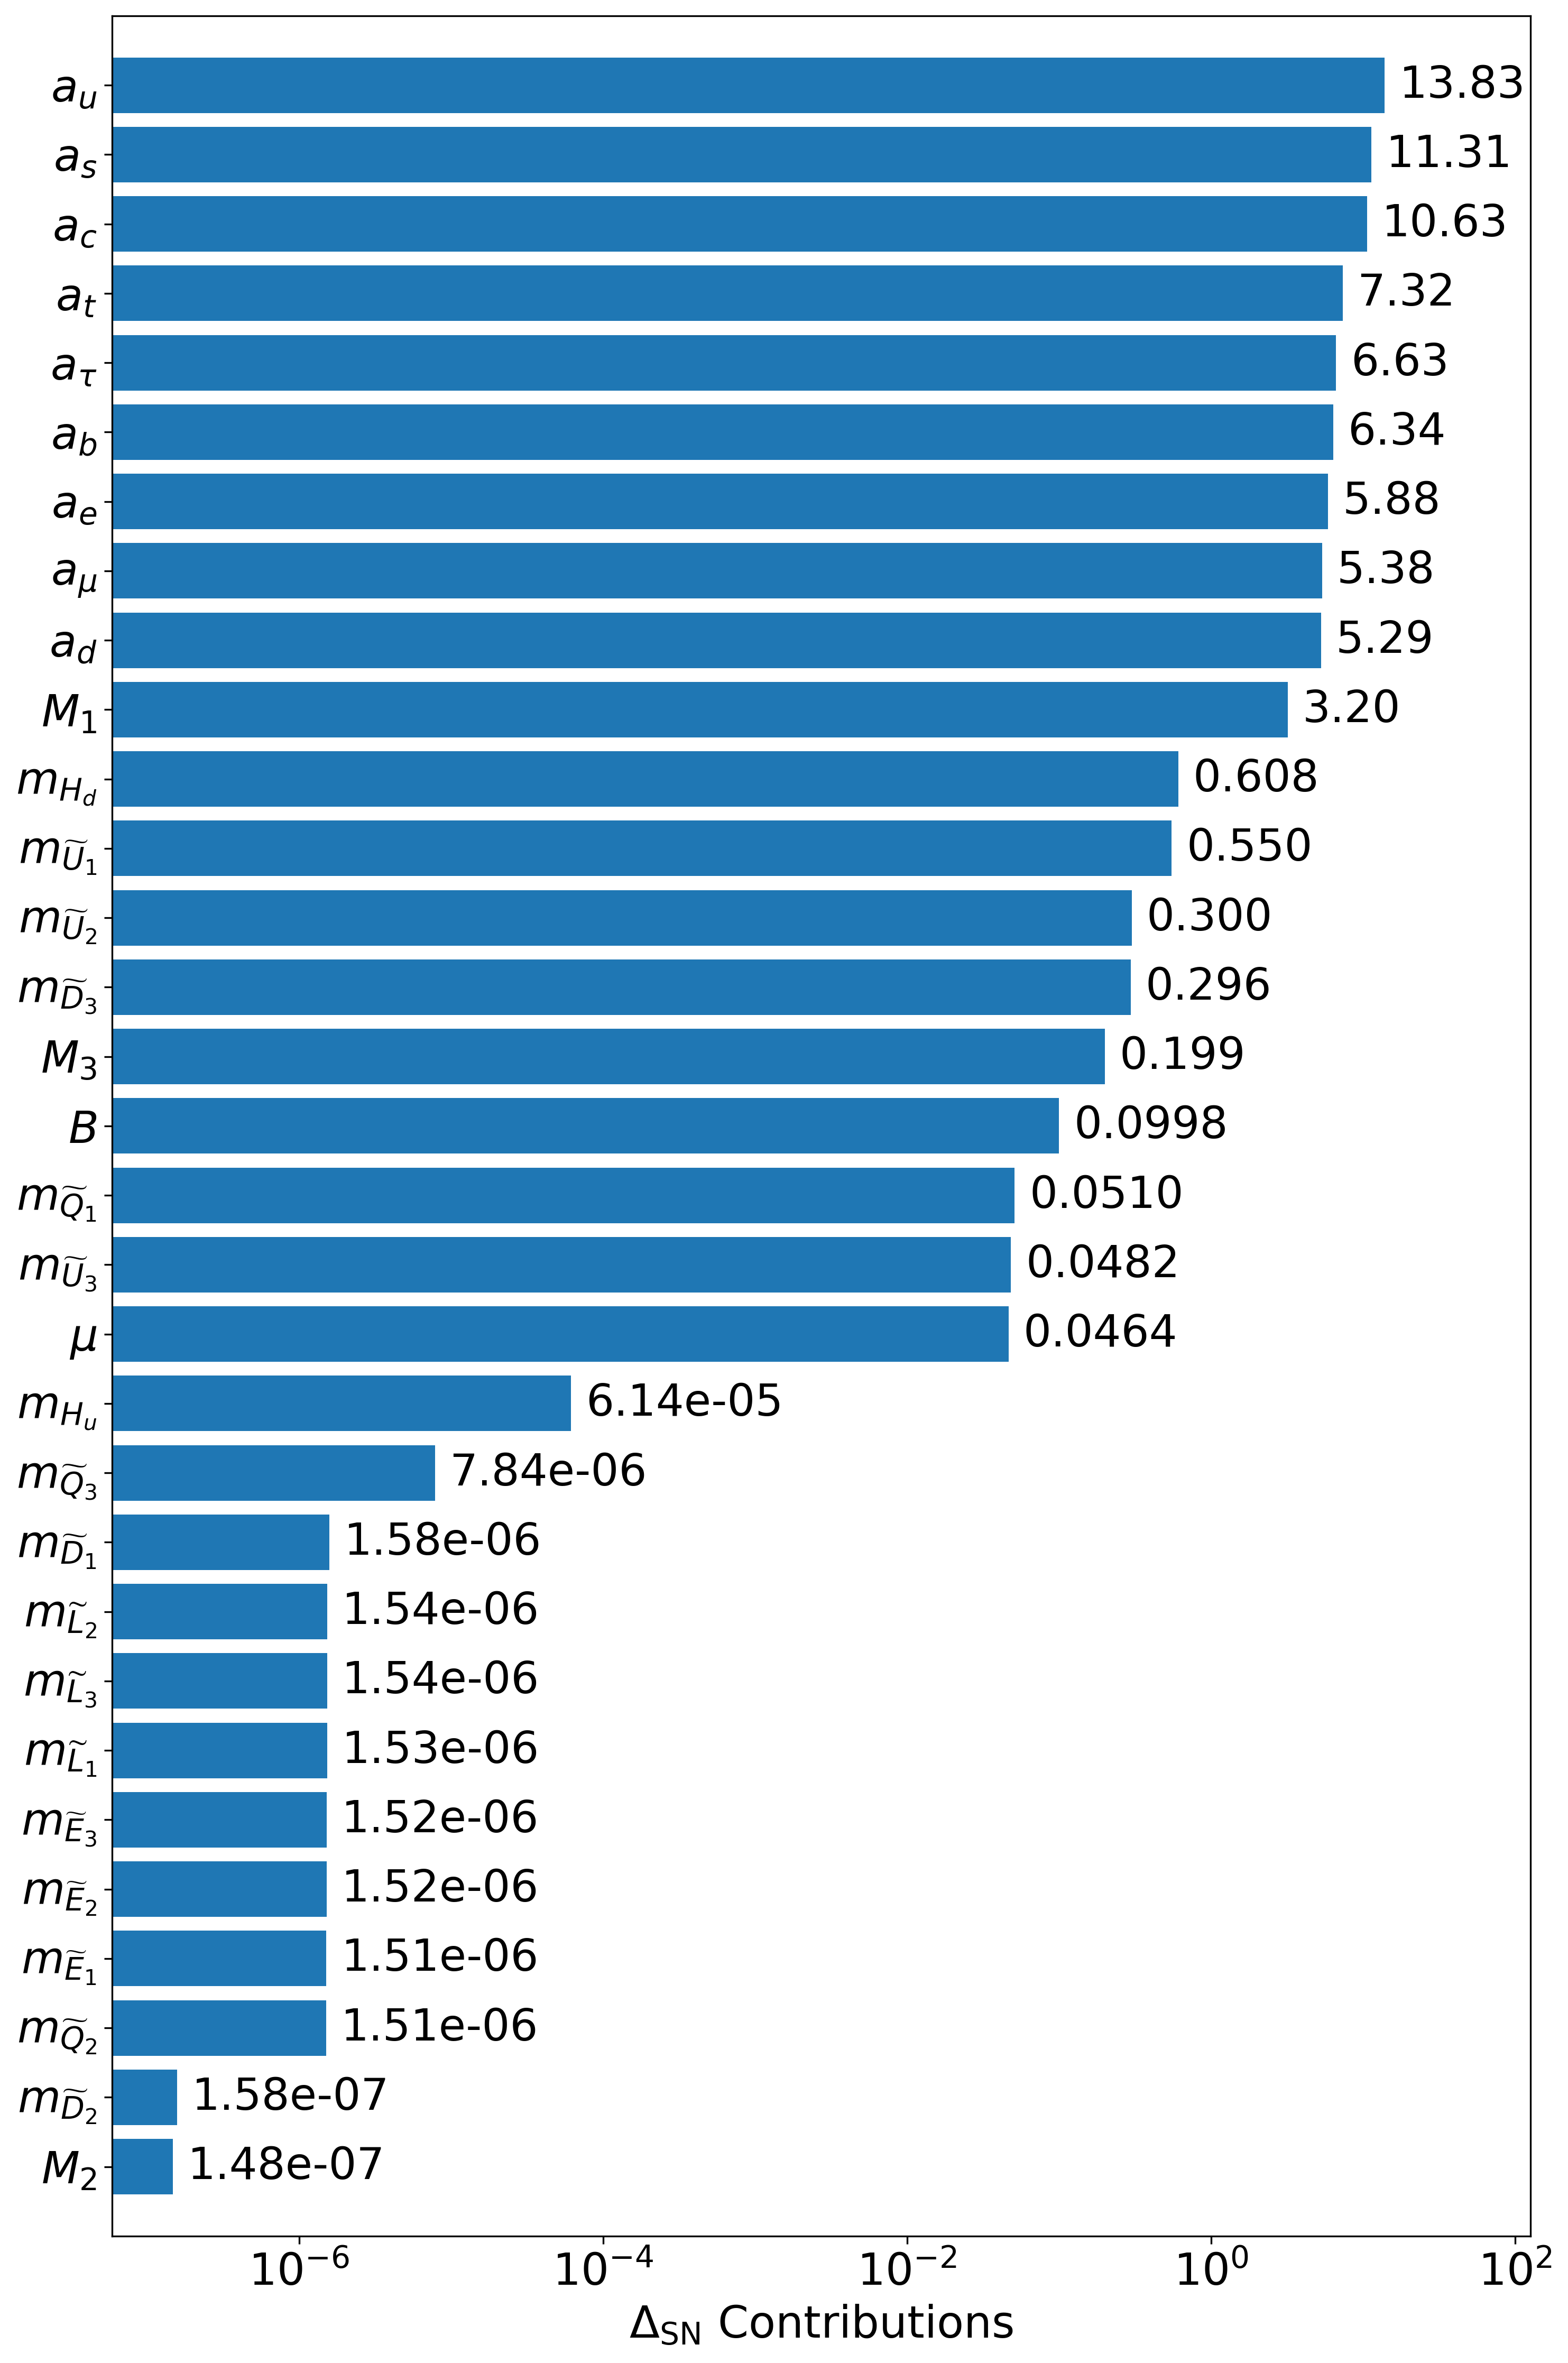

In [25]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 7.316352551,
    r"$a_c$": 10.62804215,
    r"$a_u$": 13.82622761,
    r"$a_b$": 6.337366469,
    r"$a_s$": 11.30821235,
    r"$a_d$": 5.289376474,
    r"$a_{\tau}$": 6.629149519,
    r"$a_{\mu}$": 5.375571917,
    r"$a_e$": 5.876633578,
    r"$B$": 0.099832132,
    r"$M_1$": 0.297877091032,
    r"$M_2$": 0.3007975076798,
    r"$M_3$": 0.199455351,
    r"$\mu$": 0.051188028451,
    r"$m_{H_{u}}$": 0.301029995664,
    r"$m_{H_{d}}$": 0.000000089597,
    r"$m_{\widetilde{Q}_{1}}$": 0.051025543,
    r"$m_{\widetilde{Q}_{2}}$": 0.000001513,
    r"$m_{\widetilde{Q}_{3}}$": 0.000007836,
    r"$m_{\widetilde{L}_{1}}$": 0.000001535,
    r"$m_{\widetilde{L}_{2}}$": 0.000001536,
    r"$m_{\widetilde{L}_{3}}$": 0.000001536,
    r"$m_{\widetilde{U}_{1}}$": 0.549741717,
    r"$m_{\widetilde{U}_{2}}$": 0.29974183,
    r"$m_{\widetilde{U}_{3}}$": 0.048150311,
    r"$m_{\widetilde{D}_{1}}$": 0.000001578,
    r"$m_{\widetilde{D}_{2}}$": 0.0000001578,
    r"$m_{\widetilde{D}_{3}}$": 0.295820141,
    r"$m_{\widetilde{E}_{1}}$": 0.000001515,
    r"$m_{\widetilde{E}_{2}}$": 0.000001516,
    r"$m_{\widetilde{E}_{3}}$": 0.000001518
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 2.1)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **Split** (not updated yet)

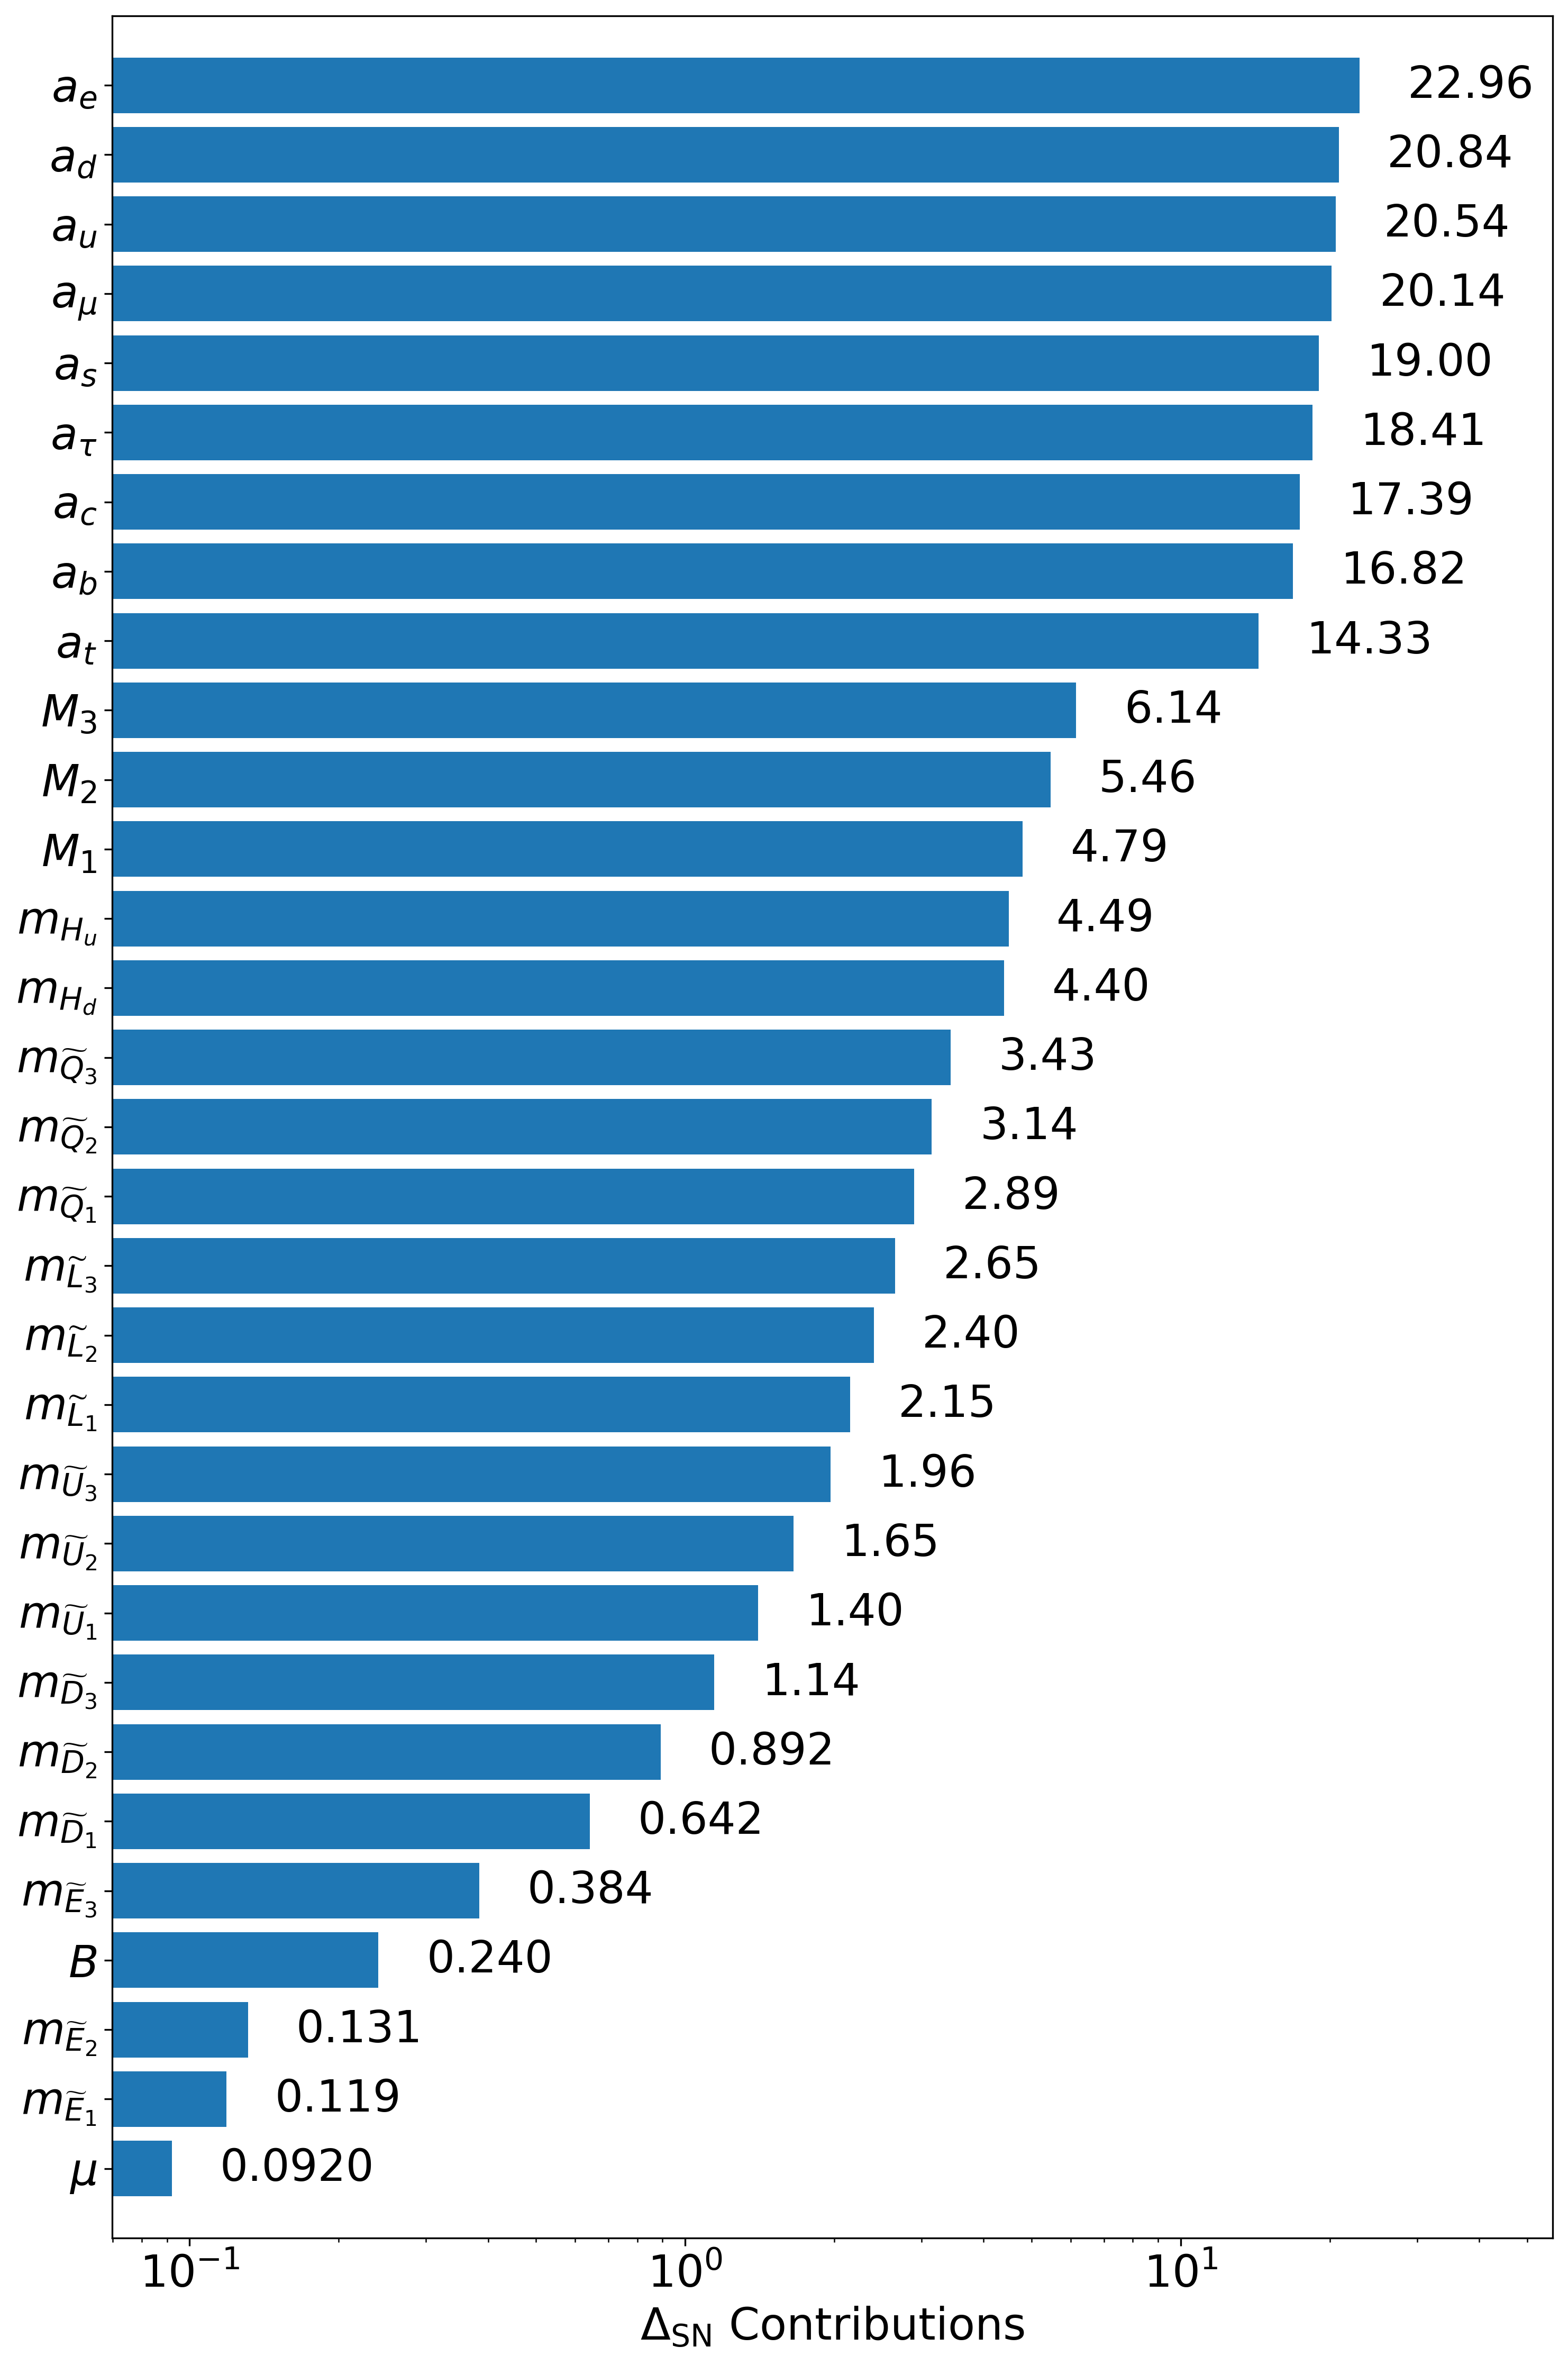

In [27]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 14.333217015,
    r"$a_c$": 17.385539827,
    r"$a_u$": 20.543773273,
    r"$a_b$": 16.820801724,
    r"$a_s$": 18.996994,
    r"$a_d$": 20.837334347,
    r"$a_{\tau}$": 18.414279112,
    r"$a_{\mu}$": 20.14258975,
    r"$a_e$": 22.958021573,
    r"$B$": 0.240398221,
    r"$M_1$": 4.790946462,
    r"$M_2$": 5.462698131,
    r"$M_3$": 6.142579637,
    r"$\mu$": 0.092034499,
    r"$m_{H_{u}}$": 4.491821516,
    r"$m_{H_{d}}$": 4.403522959,
    r"$m_{\widetilde{Q}_{1}}$": 2.894633262,
    r"$m_{\widetilde{Q}_{2}}$": 3.144633982,
    r"$m_{\widetilde{Q}_{3}}$": 3.427848153,
    r"$m_{\widetilde{L}_{1}}$": 2.150923307,
    r"$m_{\widetilde{L}_{2}}$": 2.400927917,
    r"$m_{\widetilde{L}_{3}}$": 2.652231167,
    r"$m_{\widetilde{U}_{1}}$": 1.404021056,
    r"$m_{\widetilde{U}_{2}}$": 1.654021697,
    r"$m_{\widetilde{U}_{3}}$": 1.963048084,
    r"$m_{\widetilde{D}_{1}}$": 0.641532711,
    r"$m_{\widetilde{D}_{2}}$": 0.891533503,
    r"$m_{\widetilde{D}_{3}}$": 1.143159474,
    r"$m_{\widetilde{E}_{1}}$": 0.118773628,
    r"$m_{\widetilde{E}_{2}}$": 0.131236507,
    r"$m_{\widetilde{E}_{3}}$": 0.384091810 
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.75)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **Mini-split $\widetilde{h}$ LSP**

DSN = 27.744193551702264


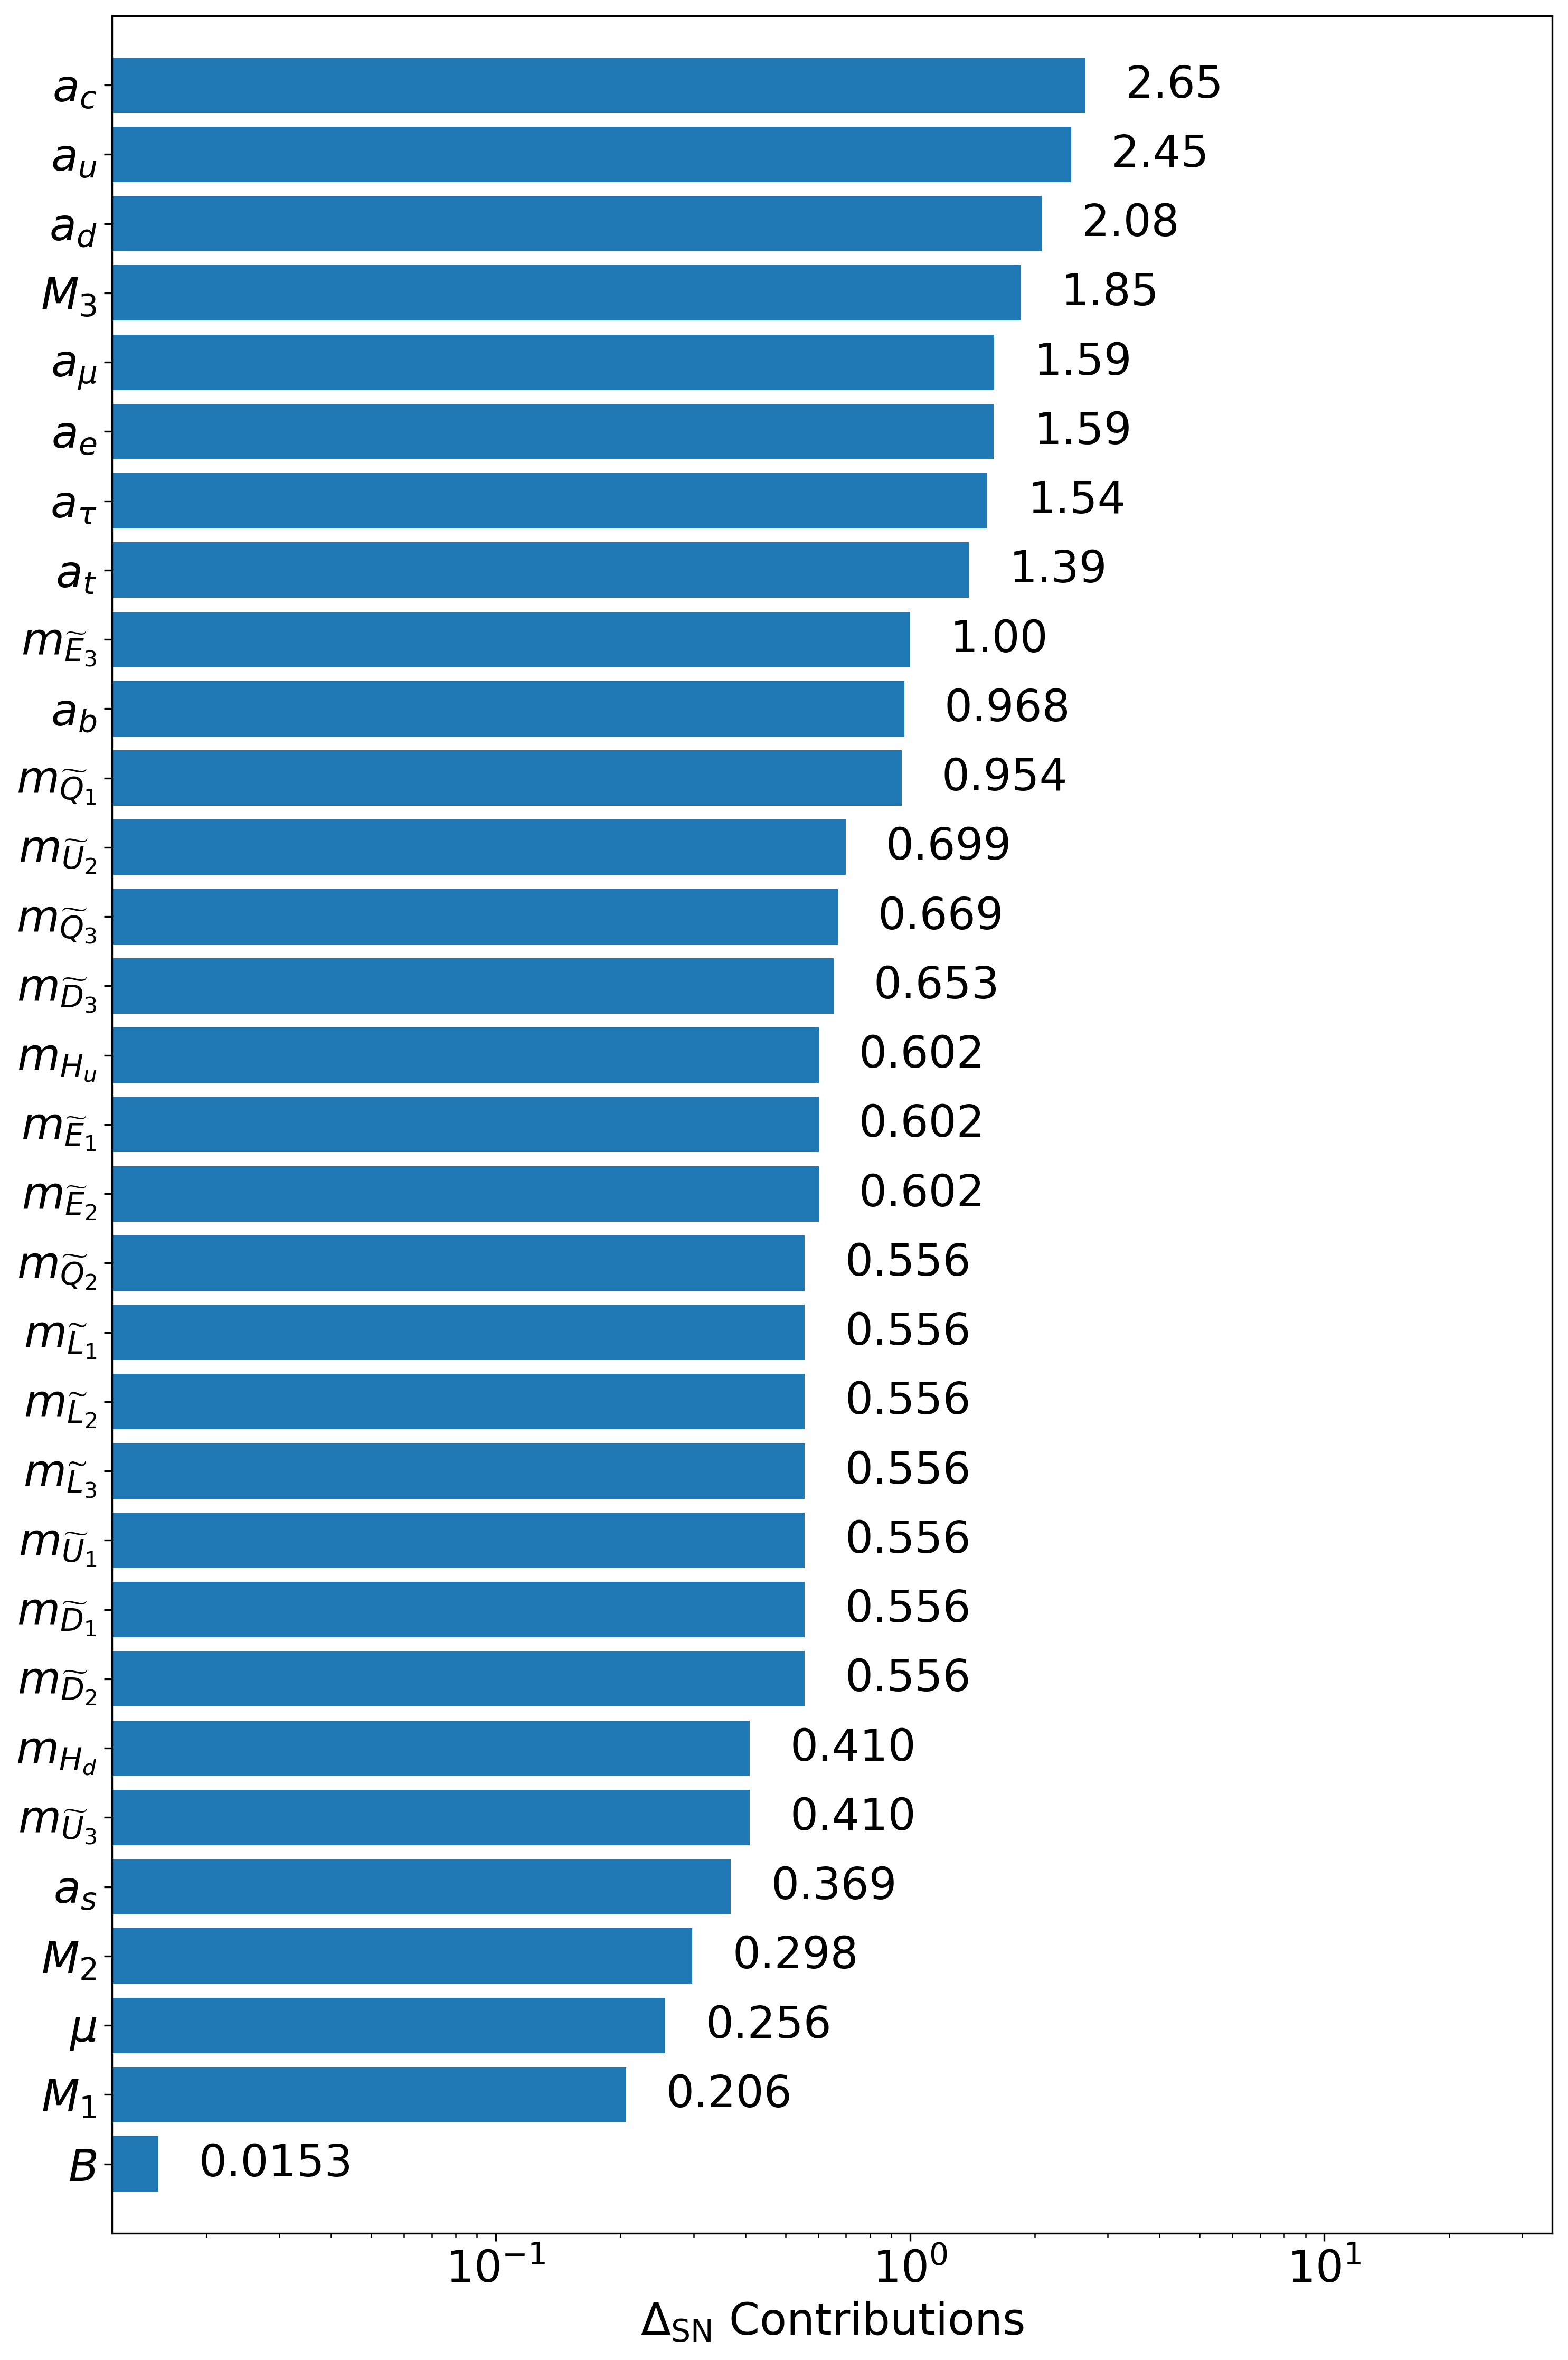

In [22]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 1.387583201693,
    r"$a_c$": 2.648662586516,
    r"$a_u$": 2.446406226613,
    r"$a_b$": 0.968302469675,
    r"$a_s$": 0.369236231226,
    r"$a_d$": 2.077162185007,
    r"$a_{\tau}$": 1.537026445479,
    r"$a_{\mu}$": 1.593599564647,
    r"$a_e$": 1.593132931892,
    r"$B$": 0.015333397092,
    r"$M_1$": 0.206102224616,
    r"$M_2$": 0.298087578231,
    r"$M_3$": 1.851105207640,
    r"$\mu$": 0.256375083333,
    r"$m_{H_{u}}$": approx_DSN_term_dim2(230624975.595313698053, 1.0),
    r"$m_{H_{d}}$": approx_DSN_term_dim2(9851576048.014999389648, 1.0),
    r"$m_{\widetilde{Q}_{1}}$": approx_DSN_term_dim2(9943753389.670787811279, 1.0),
    r"$m_{\widetilde{Q}_{2}}$": approx_DSN_term_dim2(9943682650.765058517456, 1.0),
    r"$m_{\widetilde{Q}_{3}}$": approx_DSN_term_dim2(7396974426.847485542297, 1.0),
    r"$m_{\widetilde{L}_{1}}$": approx_DSN_term_dim2(9874050145.619169235229, 1.0),
    r"$m_{\widetilde{L}_{2}}$": approx_DSN_term_dim2(9873800021.292055130005, 1.0),
    r"$m_{\widetilde{L}_{3}}$": approx_DSN_term_dim2(9797278830.434896469116, 1.0),
    r"$m_{\widetilde{U}_{1}}$": approx_DSN_term_dim2(9895048891.694765090942, 1.0),
    r"$m_{\widetilde{U}_{2}}$": approx_DSN_term_dim2(9894967802.679113388062, 1.0),
    r"$m_{\widetilde{U}_{3}}$": approx_DSN_term_dim2(4882360085.653530120850, 1.0),
    r"$m_{\widetilde{D}_{1}}$": approx_DSN_term_dim2(10024140537.962121963501, 1.0),
    r"$m_{\widetilde{D}_{2}}$": approx_DSN_term_dim2(10024140537.962121963501, 1.0),
    r"$m_{\widetilde{D}_{3}}$": approx_DSN_term_dim2(9885495734.193223953247, 1.0),
    r"$m_{\widetilde{E}_{1}}$": approx_DSN_term_dim2(10091413284.009099960327, 1.0),
    r"$m_{\widetilde{E}_{2}}$": approx_DSN_term_dim2(10090910995.966306686401, 1.0),
    r"$m_{\widetilde{E}_{3}}$": approx_DSN_term_dim2(9937230633.931453704834, 1.0)
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.55)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **Mini-split $\widetilde{W}$ LSP** (not updated yet)

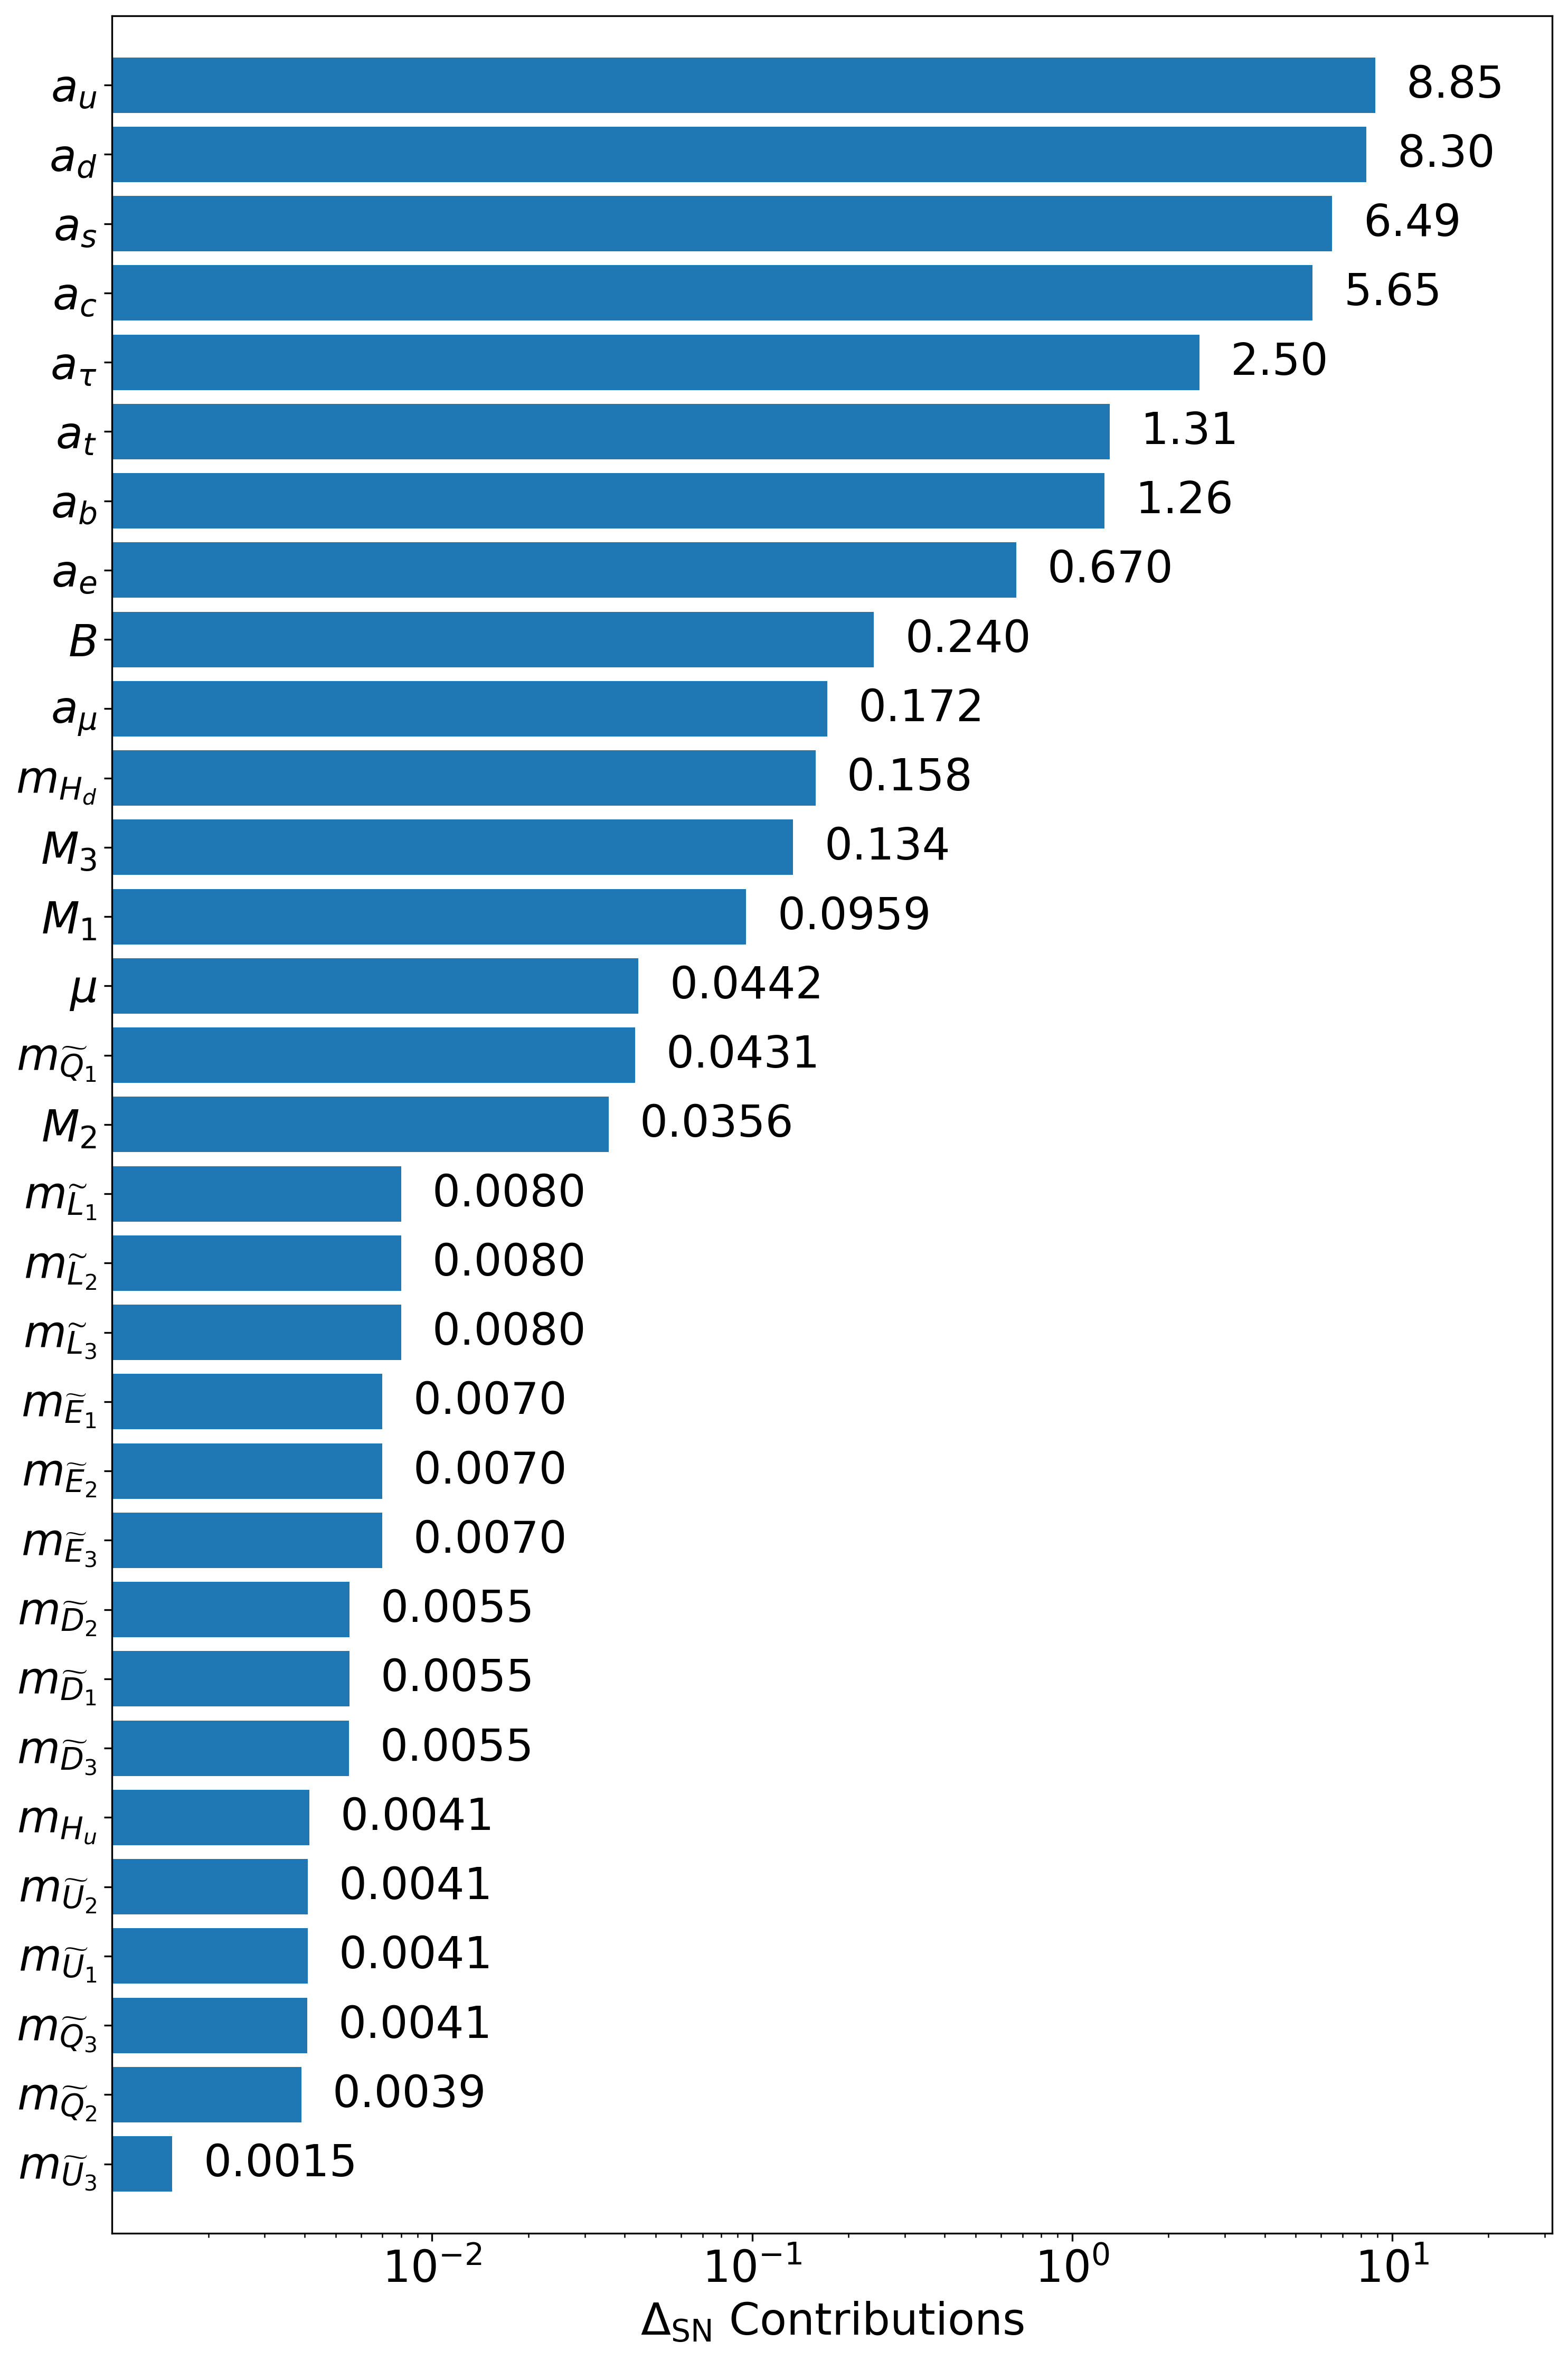

In [30]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 1.309163123,
    r"$a_c$": 5.647077998,
    r"$a_u$": 8.845259489,
    r"$a_b$": 1.262131895,
    r"$a_s$": 6.490616734,
    r"$a_d$": 8.300797325,
    r"$a_{\tau}$": 2.498478468,
    r"$a_{\mu}$": 0.171648885,
    r"$a_e$": 0.669807145,
    r"$B$": 0.240350496,
    r"$M_1$": 0.095885198,
    r"$M_2$": 0.035617933,
    r"$M_3$": 0.134368714,
    r"$\mu$": 0.044176048,
    r"$m_{H_{u}}$": 0.004138112,
    r"$m_{H_{d}}$": 0.15780844,
    r"$m_{\widetilde{Q}_{1}}$": 0.043133271,
    r"$m_{\widetilde{Q}_{2}}$": 0.003905218,
    r"$m_{\widetilde{Q}_{3}}$": 0.004077261,
    r"$m_{\widetilde{L}_{1}}$": 0.008019471,
    r"$m_{\widetilde{L}_{2}}$": 0.008019467,
    r"$m_{\widetilde{L}_{3}}$": 0.008019239,
    r"$m_{\widetilde{U}_{1}}$": 0.004088421,
    r"$m_{\widetilde{U}_{2}}$": 0.004088763,
    r"$m_{\widetilde{U}_{3}}$": 0.001542832,
    r"$m_{\widetilde{D}_{1}}$": 0.005518186,
    r"$m_{\widetilde{D}_{2}}$": 0.005518190,
    r"$m_{\widetilde{D}_{3}}$": 0.005492195,
    r"$m_{\widetilde{E}_{1}}$": 0.006991580,
    r"$m_{\widetilde{E}_{2}}$": 0.006991577,
    r"$m_{\widetilde{E}_{3}}$": 0.006990521 
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.5)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **Spread $\widetilde{h}$ LSP** (not updated yet)

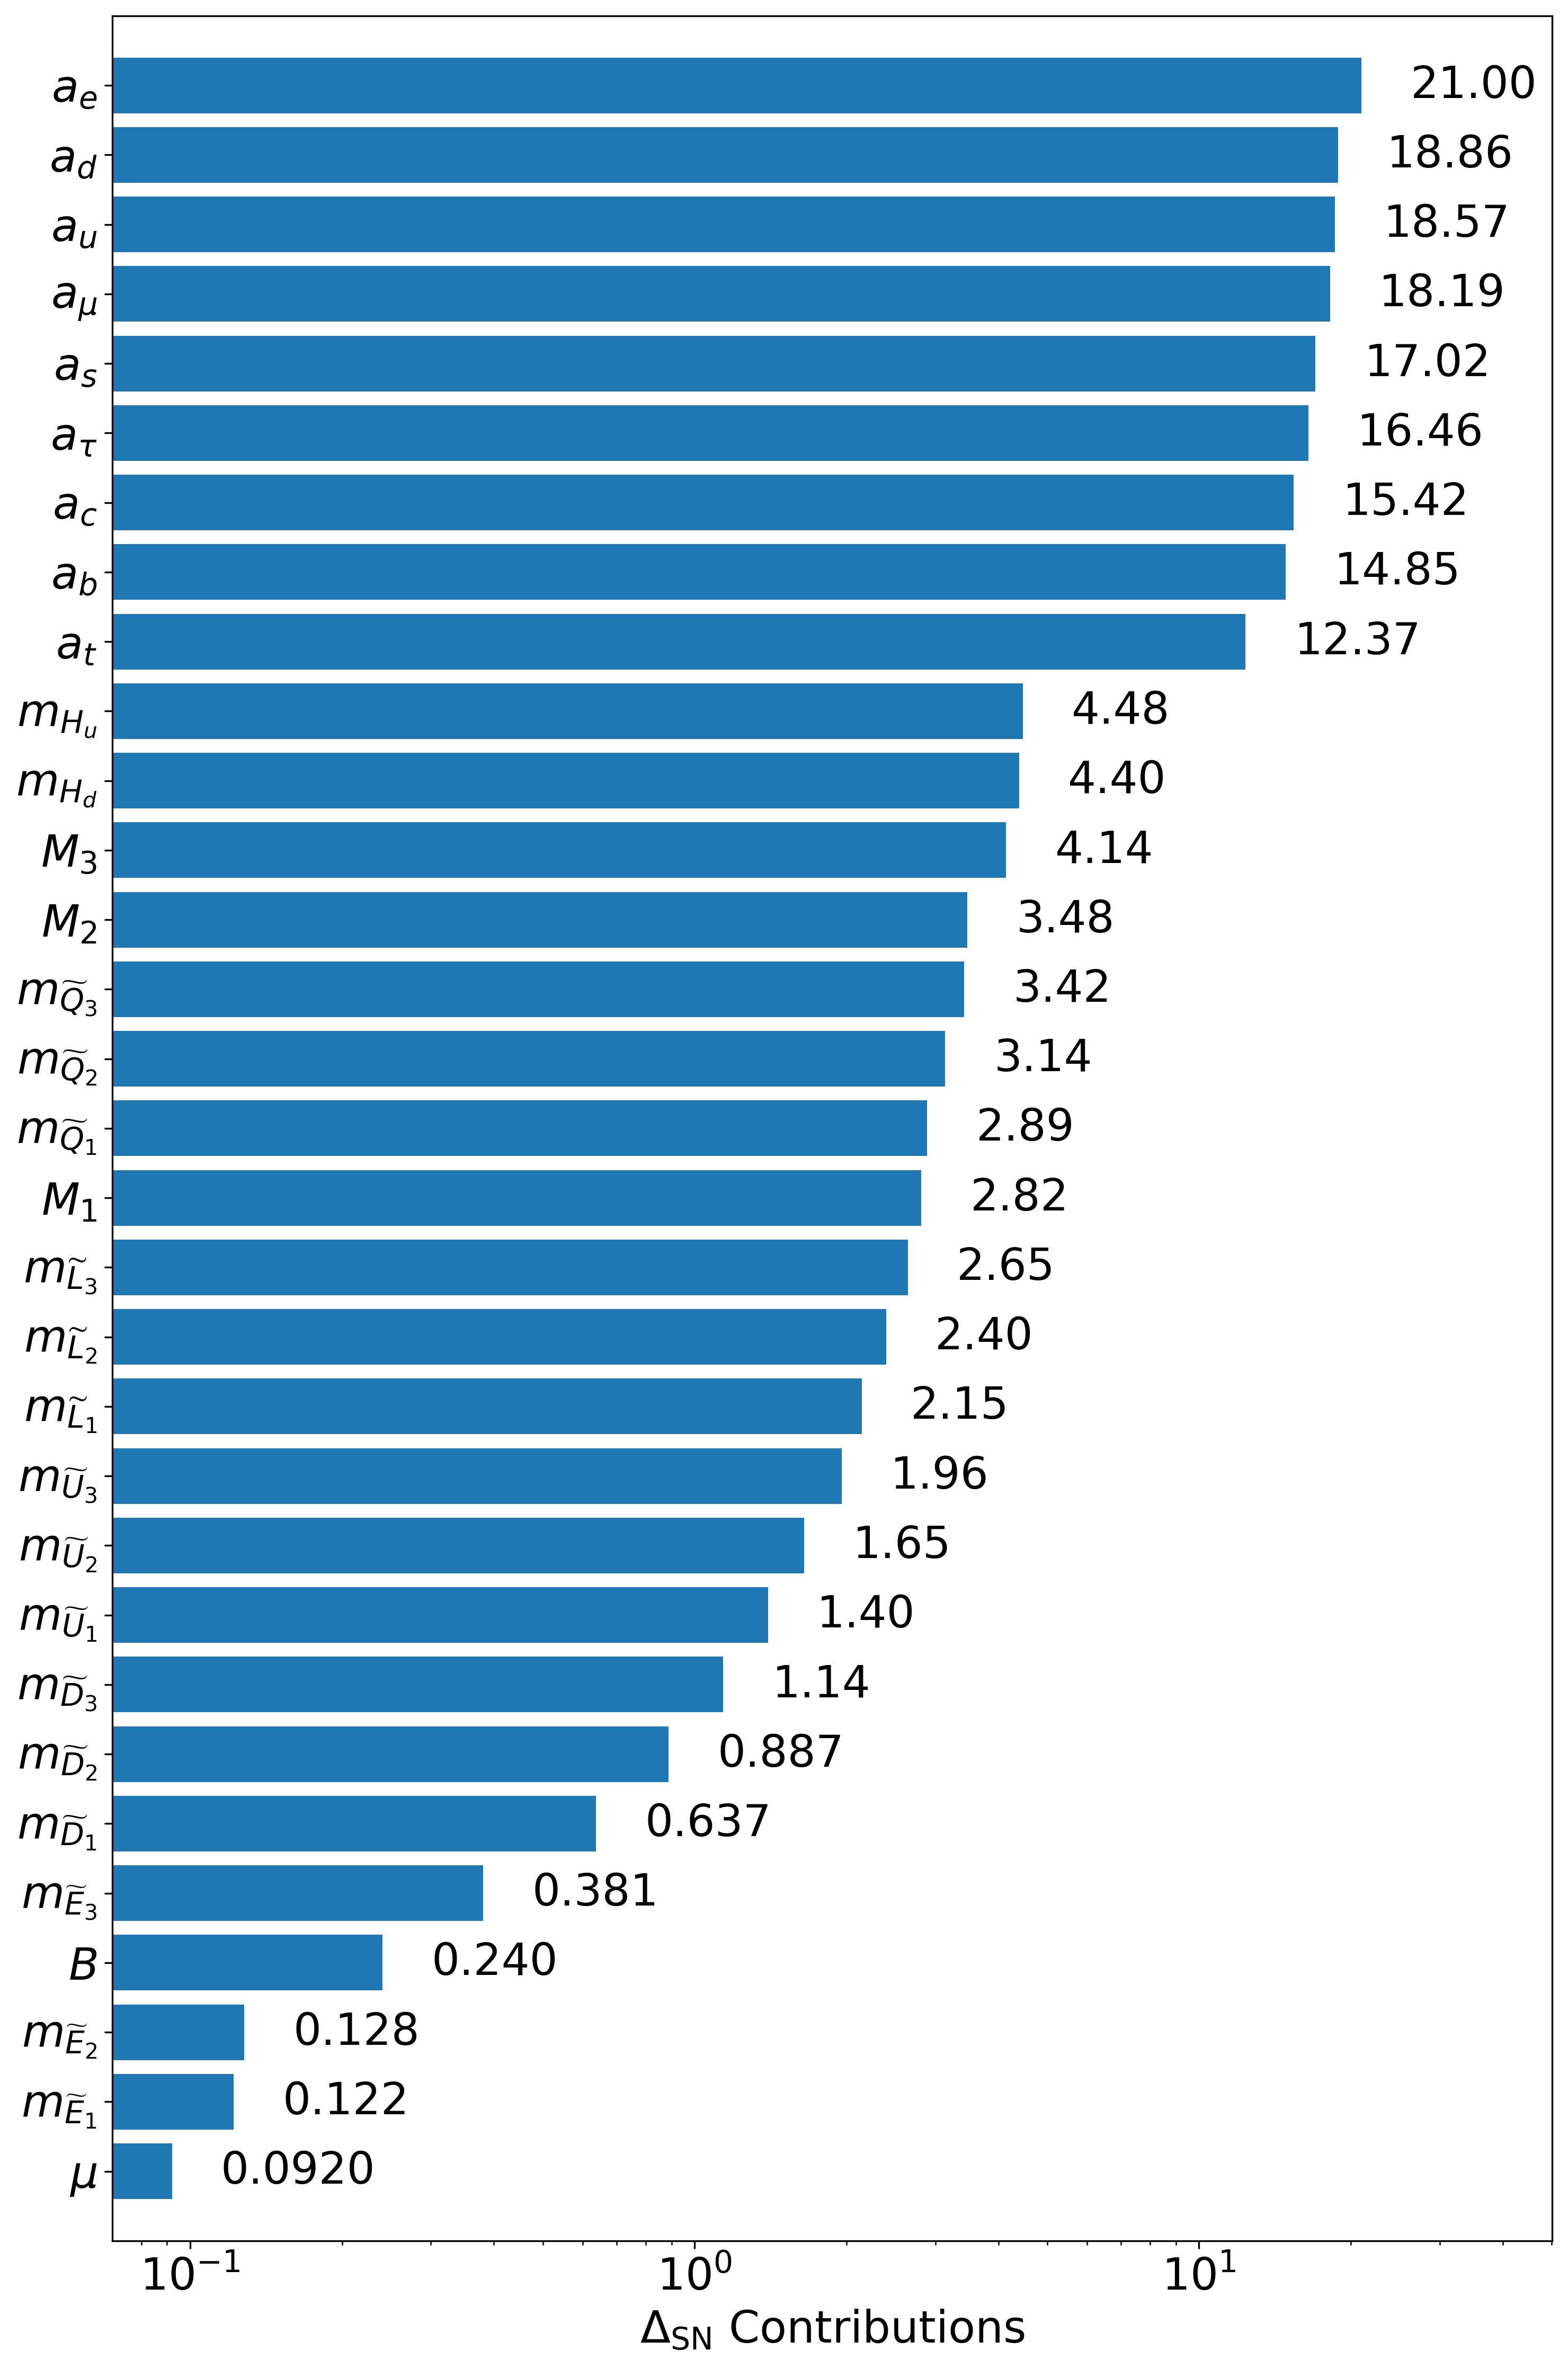

In [38]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 12.366044354,
    r"$a_c$": 15.415185096,
    r"$a_u$": 18.573418507,
    r"$a_b$": 14.848143586,
    r"$a_s$": 17.023049171,
    r"$a_d$": 18.863389483,
    r"$a_{\tau}$": 16.458599644,
    r"$a_{\mu}$": 18.186751570,
    r"$a_e$": 21.002243824,
    r"$B$": 0.240398221,
    r"$M_1$": 2.816573457,
    r"$M_2$": 3.476228846,
    r"$M_3$": 4.144842604,
    r"$\mu$": 0.092034499,
    r"$m_{H_{u}}$": 4.476885614,
    r"$m_{H_{d}}$": 4.398239066,
    r"$m_{\widetilde{Q}_{1}}$": 2.890198296,
    r"$m_{\widetilde{Q}_{2}}$": 3.140198988,
    r"$m_{\widetilde{Q}_{3}}$": 3.421827389,
    r"$m_{\widetilde{L}_{1}}$": 2.145801188,
    r"$m_{\widetilde{L}_{2}}$": 2.395805603,
    r"$m_{\widetilde{L}_{3}}$": 2.647053564,
    r"$m_{\widetilde{U}_{1}}$": 1.398741747,
    r"$m_{\widetilde{U}_{2}}$": 1.648742363,
    r"$m_{\widetilde{U}_{3}}$": 1.955271189,
    r"$m_{\widetilde{D}_{1}}$": 0.63742305,
    r"$m_{\widetilde{D}_{2}}$": 0.887423812,
    r"$m_{\widetilde{D}_{3}}$": 1.138984842,
    r"$m_{\widetilde{E}_{1}}$": 0.121980006,
    r"$m_{\widetilde{E}_{2}}$": 0.128029613,
    r"$m_{\widetilde{E}_{3}}$": 0.380739822 
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.7)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **Spread $\widetilde{W}$ LSP** (not updated yet)

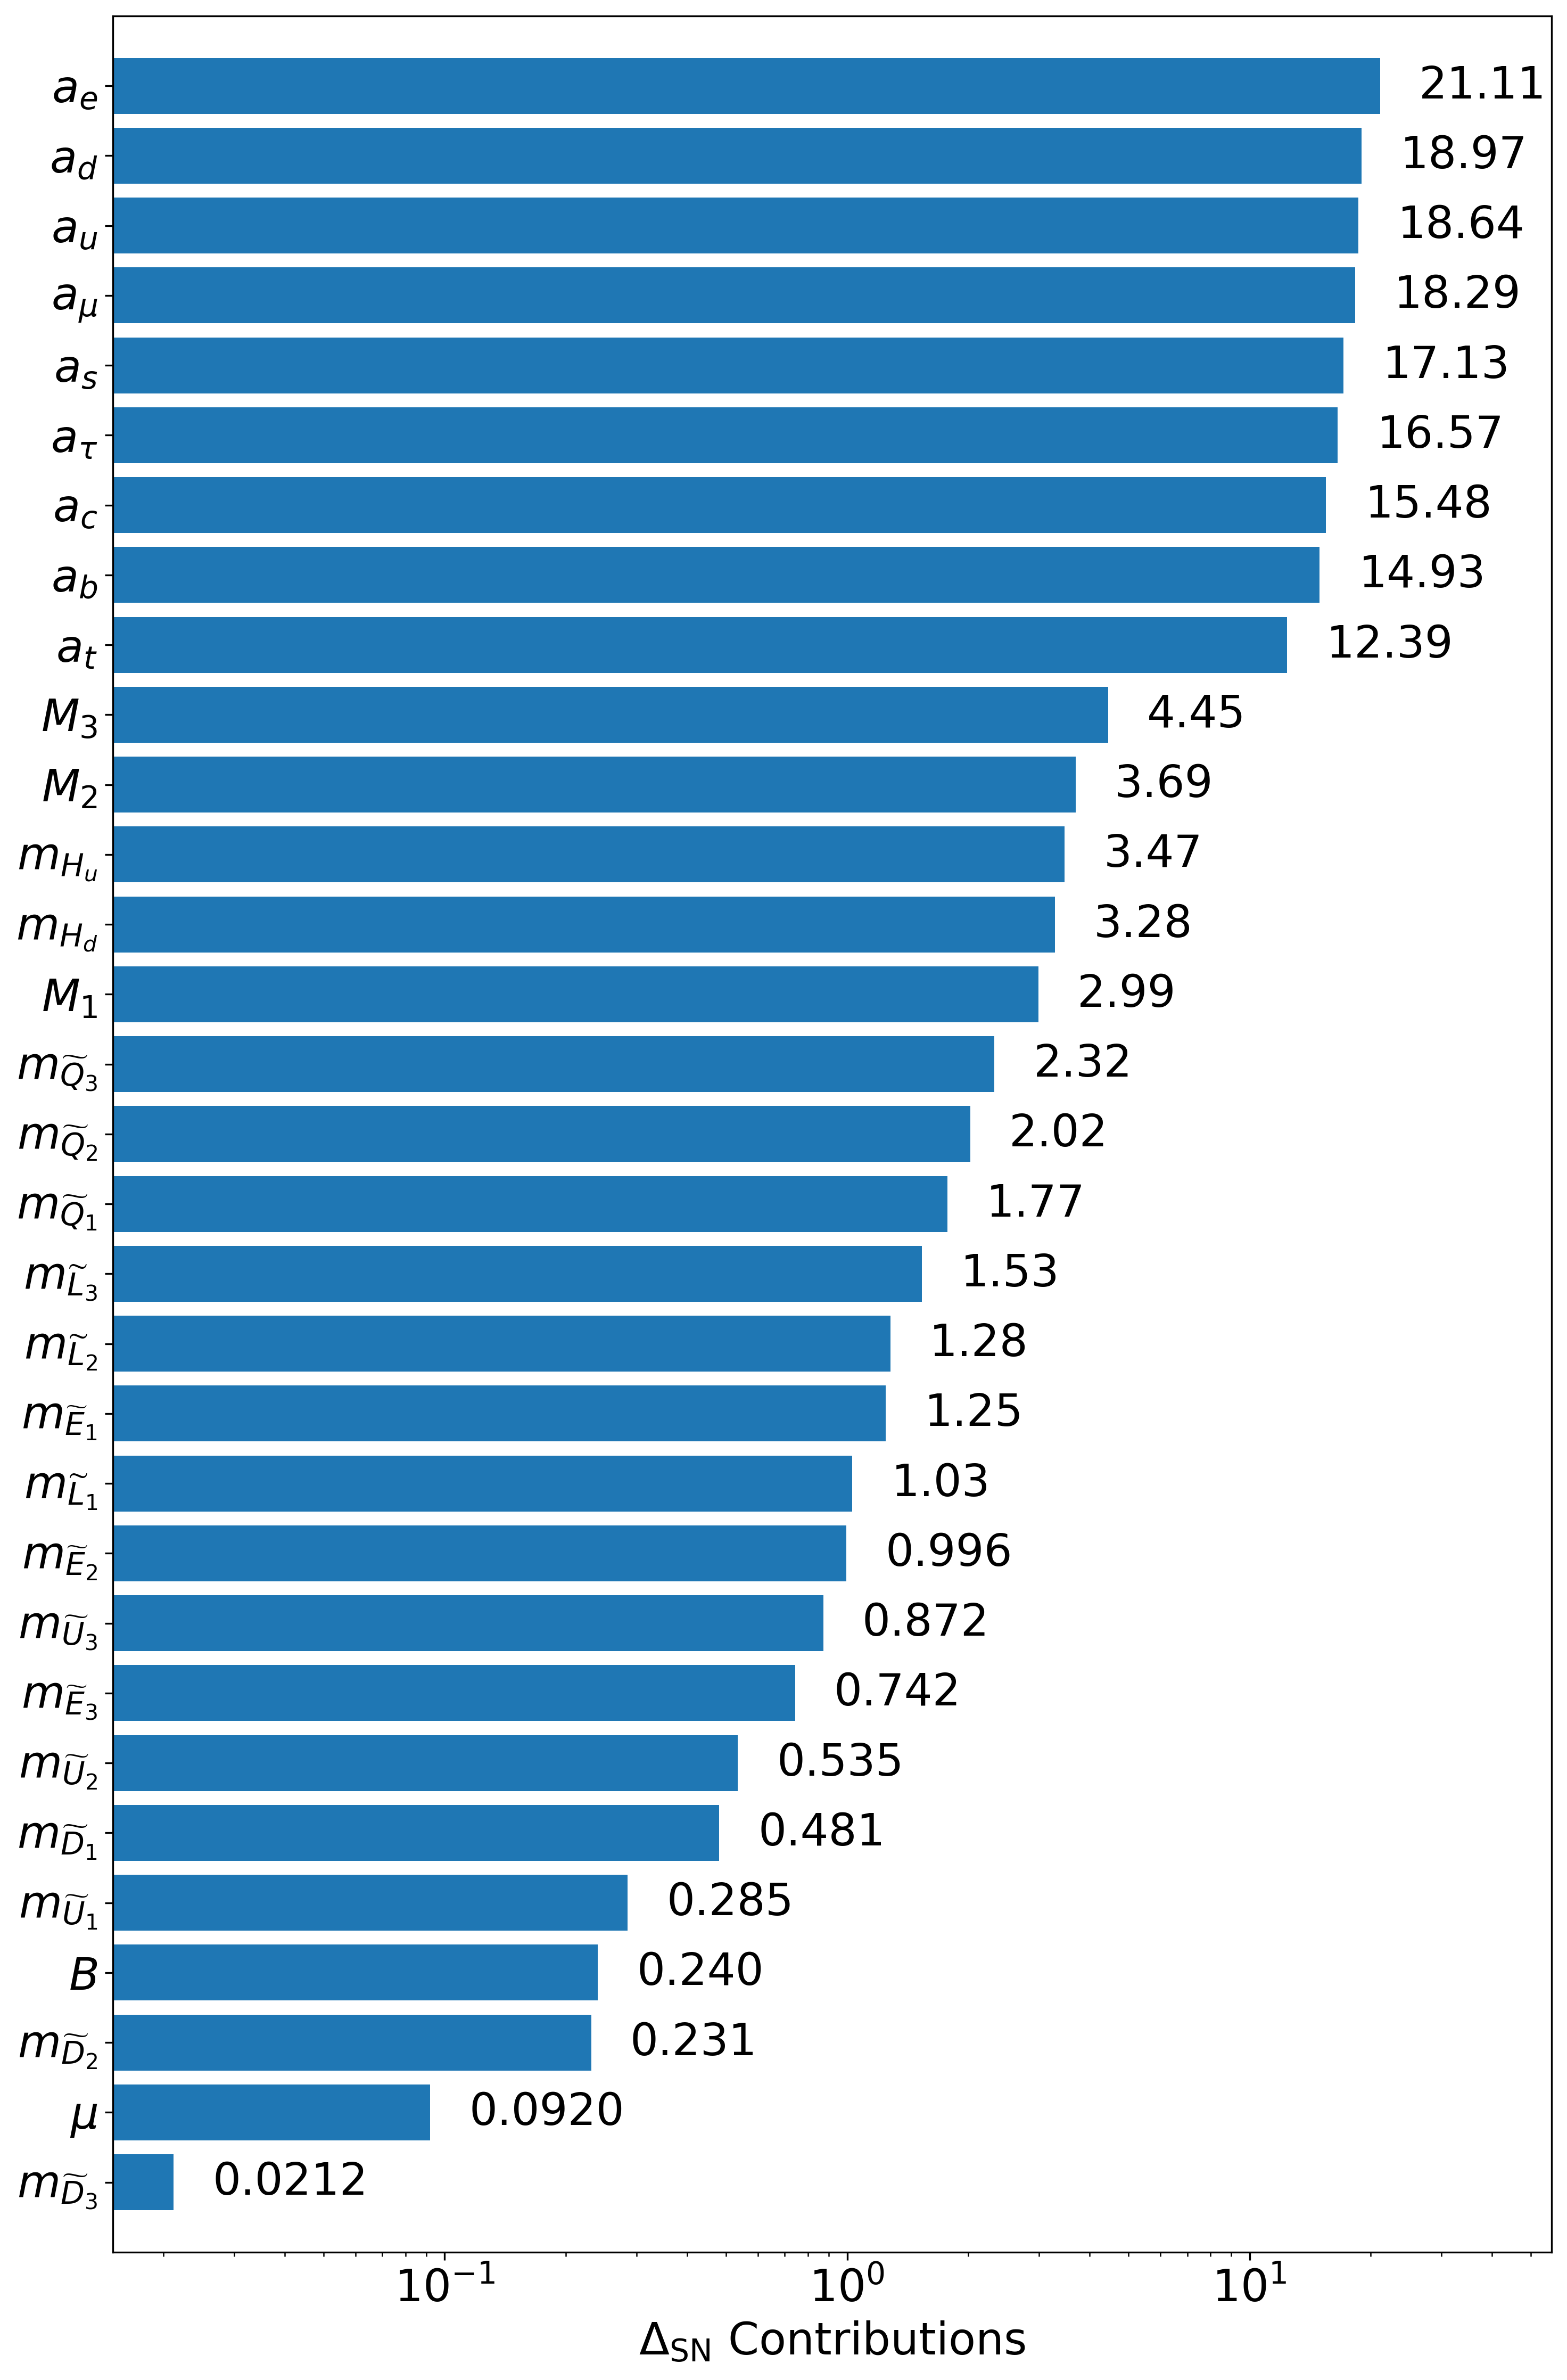

In [41]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 12.394687959,
    r"$a_c$": 15.477251926,
    r"$a_u$": 18.635485718,
    r"$a_b$": 14.931313864,
    r"$a_s$": 17.130848574,
    r"$a_d$": 18.971189416,
    r"$a_{\tau}$": 16.566143701,
    r"$a_{\mu}$": 18.294834361,
    r"$a_e$": 21.11032851,
    r"$B$": 0.240398221,
    r"$M_1$": 2.9873847,
    r"$M_2$": 3.693587601,
    r"$M_3$": 4.447838574,
    r"$\mu$": 0.092034499,
    r"$m_{H_{u}}$": 3.470477883,
    r"$m_{H_{d}}$": 3.281698564,
    r"$m_{\widetilde{Q}_{1}}$": 1.772847305,
    r"$m_{\widetilde{Q}_{2}}$": 2.022848345,
    r"$m_{\widetilde{Q}_{3}}$": 2.323930289,
    r"$m_{\widetilde{L}_{1}}$": 1.029904416,
    r"$m_{\widetilde{L}_{2}}$": 1.279909883,
    r"$m_{\widetilde{L}_{3}}$": 1.531456501,
    r"$m_{\widetilde{U}_{1}}$": 0.284748521,
    r"$m_{\widetilde{U}_{2}}$": 0.534749485,
    r"$m_{\widetilde{U}_{3}}$": 0.872346004,
    r"$m_{\widetilde{D}_{1}}$": 0.481210902,
    r"$m_{\widetilde{D}_{2}}$": 0.231209806,
    r"$m_{\widetilde{D}_{3}}$": 0.021180112,
    r"$m_{\widetilde{E}_{1}}$": 1.245707401,
    r"$m_{\widetilde{E}_{2}}$": 0.995695047,
    r"$m_{\widetilde{E}_{3}}$": 0.742215056 
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 1.75)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()

# **RNS**

DSN = 1.165699808002


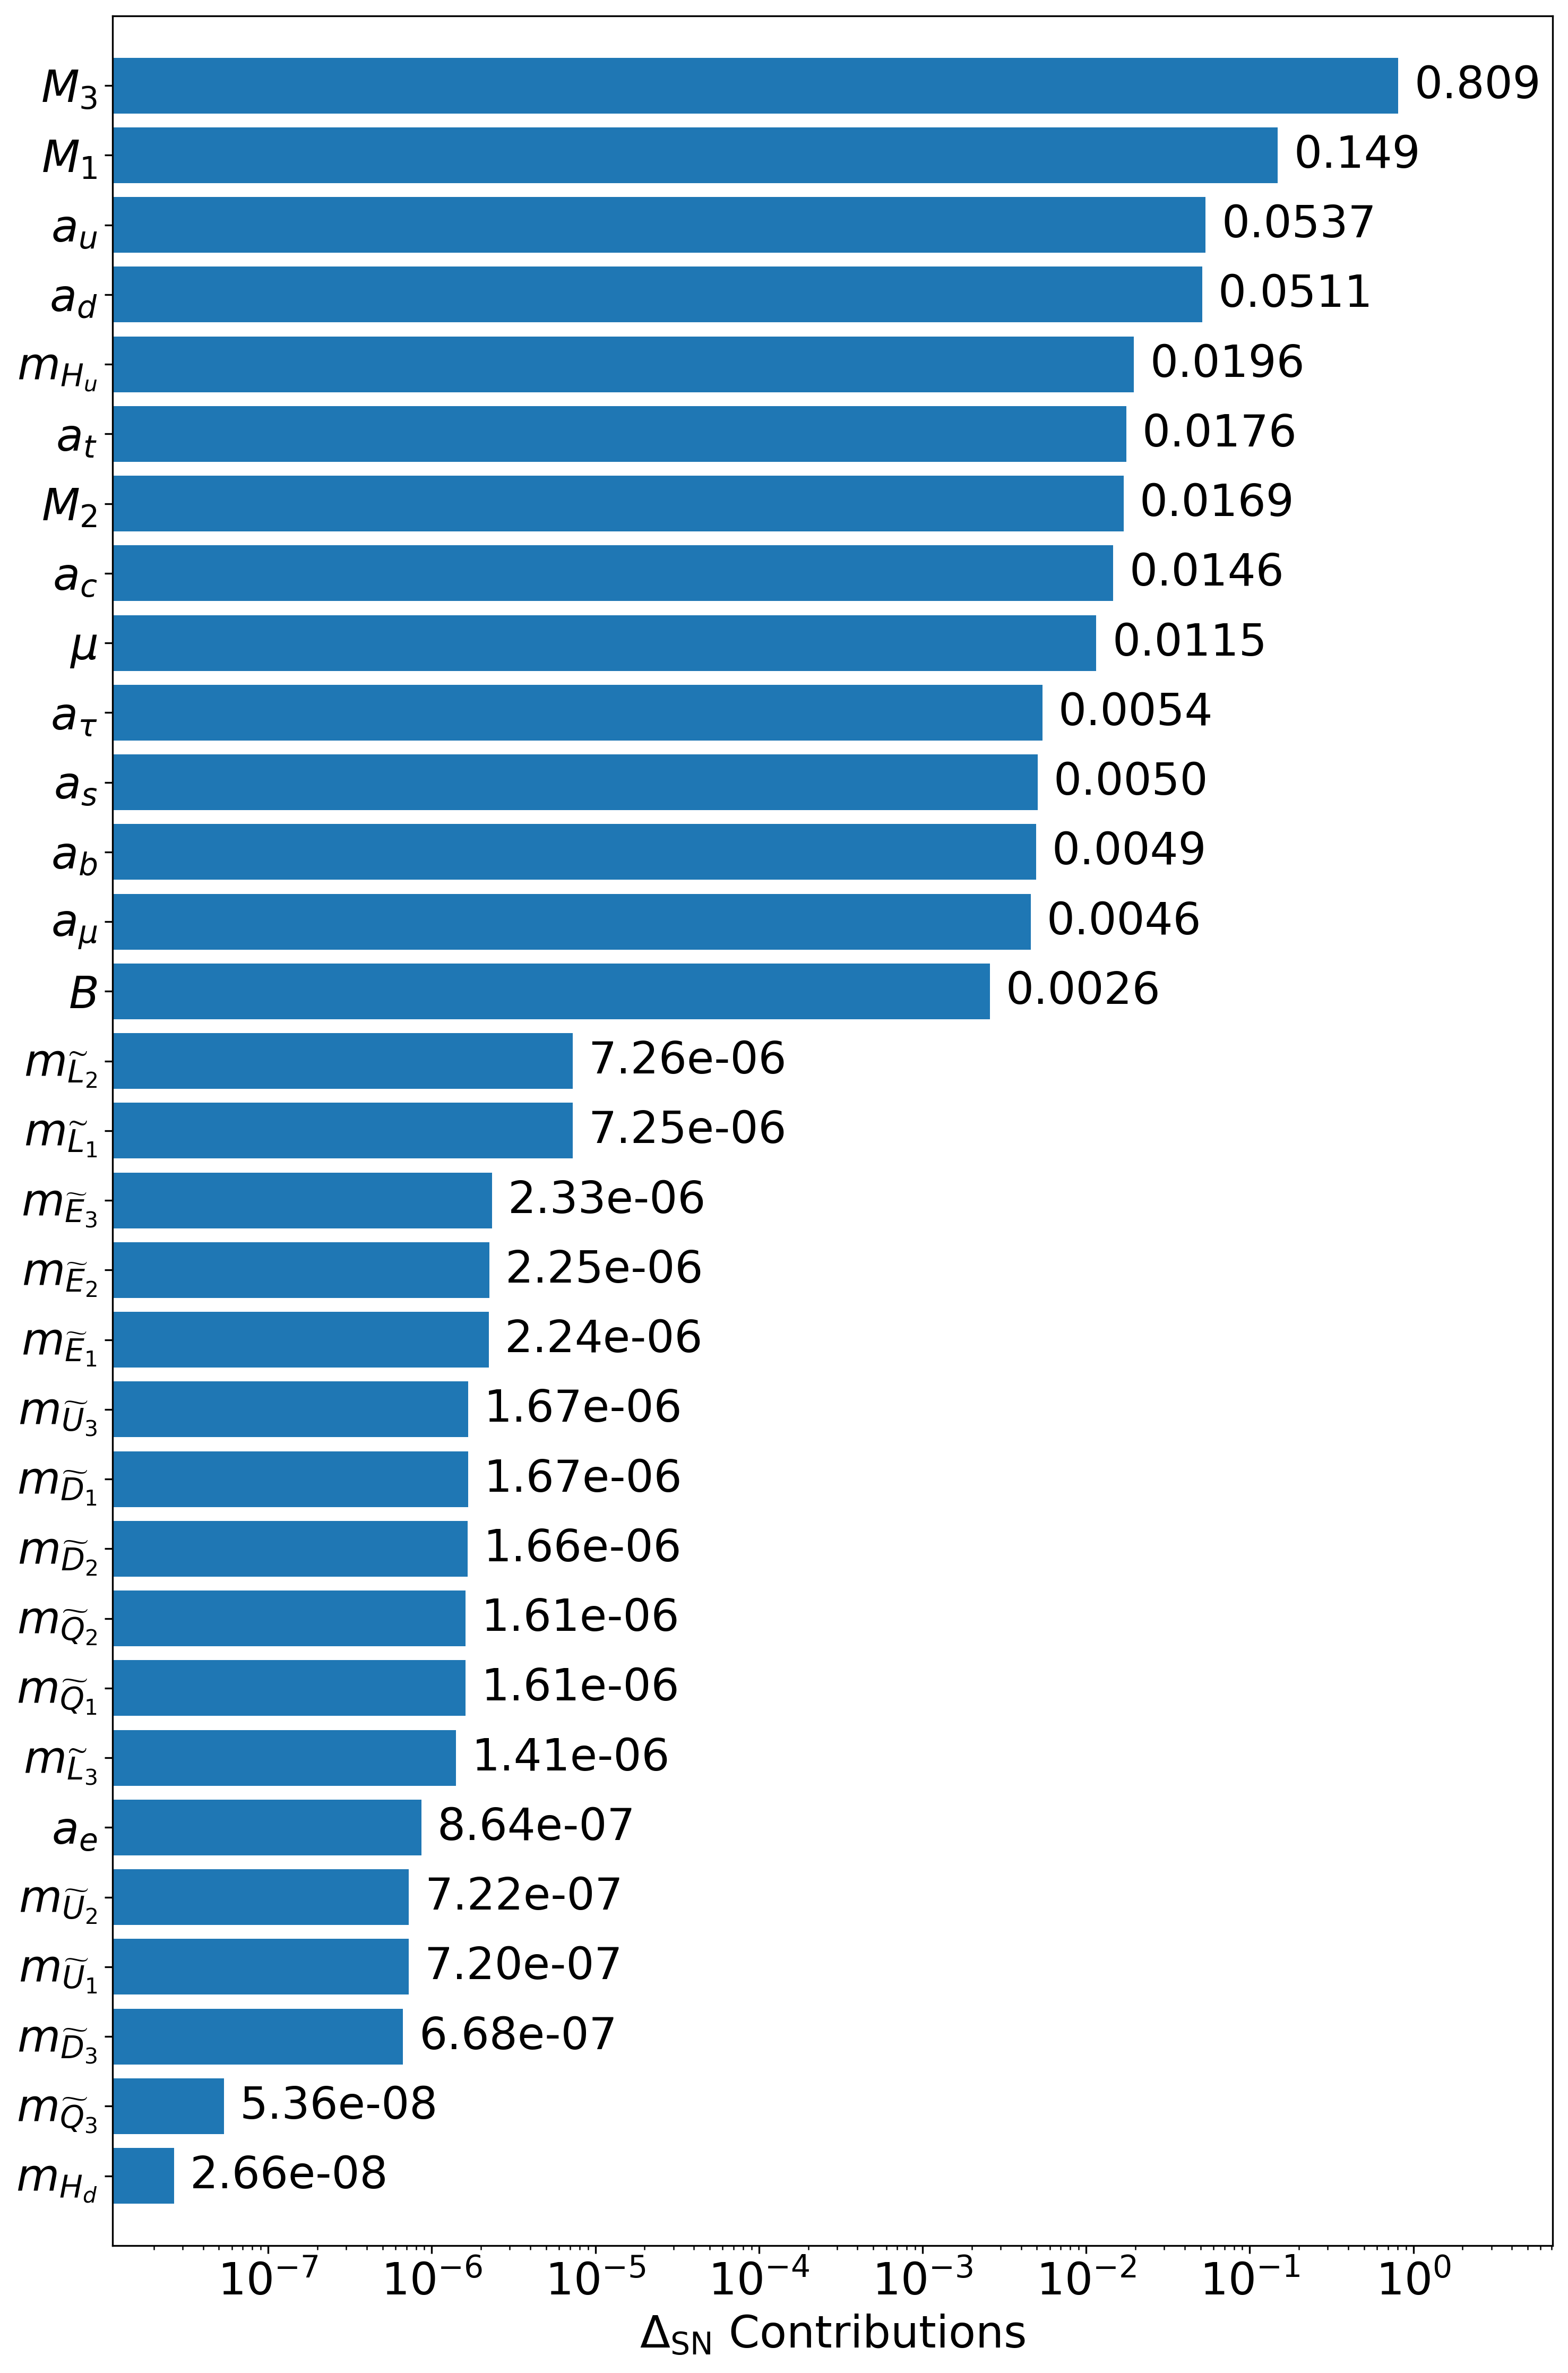

In [23]:
import matplotlib.pyplot as plt

data = {
    r"$a_t$": 0.017575203766,
    r"$a_c$": 0.014645319713,
    r"$a_u$": 0.053676043851,
    r"$a_b$": 0.004932206211,
    r"$a_s$": 0.005047415030,
    r"$a_d$": 0.051084985520,
    r"$a_{\tau}$": 0.005408305906,
    r"$a_{\mu}$": 0.004592854358,
    r"$a_e$": 0.000000864257,
    r"$B$": 0.002578885149,
    r"$M_1$": 0.148648266260,
    r"$M_2$": 0.016910491198,
    r"$M_3$": 0.809442012261,
    r"$\mu$": 0.011518913293,
    r"$m_{H_{u}}$": 0.019604897270,
    r"$m_{H_{d}}$": 0.000000026551,
    r"$m_{\widetilde{Q}_{1}}$": 0.000001606224,
    r"$m_{\widetilde{Q}_{2}}$": 0.000001610783,
    r"$m_{\widetilde{Q}_{3}}$": 0.000000053556,
    r"$m_{\widetilde{L}_{1}}$": 0.000007250008,
    r"$m_{\widetilde{L}_{2}}$": 0.000007257407,
    r"$m_{\widetilde{L}_{3}}$": 0.000001407761,
    r"$m_{\widetilde{U}_{1}}$": 0.000000720437,
    r"$m_{\widetilde{U}_{2}}$": 0.000000722346,
    r"$m_{\widetilde{U}_{3}}$": 0.000001671720,
    r"$m_{\widetilde{D}_{1}}$": 0.000001666717,
    r"$m_{\widetilde{D}_{2}}$": 0.000001662044,
    r"$m_{\widetilde{D}_{3}}$": 0.000000668033,
    r"$m_{\widetilde{E}_{1}}$": 0.000002240325,
    r"$m_{\widetilde{E}_{2}}$": 0.000002245408,
    r"$m_{\widetilde{E}_{3}}$": 0.000002334639
}
total_sum = sum(data.values())
print("DSN = " + str(total_sum))

sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

plt.figure(dpi=300, figsize=(10, 15))
bars = plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel(r'$\Delta_{\mathrm{SN}}$ Contributions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
num_bars = len(sorted_data)
plt.ylim(-1, num_bars)
plt.xlim(right=10 ** 0.85)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (since it's a horizontal bar plot)
    if width < 1e-3:
        format_str = "{:.2e}"
    elif width < 0.1:
        format_str = "{:.4f}"
    elif width < 1:
        format_str = "{:.3f}"
    else:
        format_str = "{:.2f}"
    label_x_pos = width * 1.25  # Calculate the x position for the label
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, format_str.format(width), 
             va='center', ha='left', fontsize=20)
    
plt.tight_layout()
plt.show()